In [1]:
import itertools
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path 
import sys
import threading
import os
import powerlaw
from IPython.display import clear_output
from collections import Counter

{1: 10943, 2: 24138, 3: 29149, 4: 24411, 5: 19881, 6: 15567, 7: 11982, 8: 9728, 9: 8124, 10: 6698, 11: 5954, 12: 4986, 13: 4208, 14: 3675, 15: 3190, 16: 2964, 17: 2735, 18: 2252, 19: 2129, 20: 2008, 21: 1850, 22: 1541, 23: 1463, 24: 1374, 25: 1313, 26: 1265, 27: 1164, 28: 1124, 29: 1023, 30: 855, 31: 881, 32: 876, 33: 893, 34: 746, 35: 716, 36: 608, 37: 657, 38: 646, 39: 504, 40: 461, 41: 519, 42: 588, 43: 565, 44: 457, 45: 313, 46: 392, 47: 410, 48: 409, 49: 431, 50: 354, 51: 339, 52: 277, 53: 388, 54: 301, 55: 267, 56: 310, 57: 239, 58: 202, 59: 223, 60: 252, 61: 239, 62: 197, 63: 213, 64: 133, 65: 253, 66: 142, 67: 170, 68: 180, 69: 197, 70: 153, 71: 183, 72: 159, 73: 200, 74: 158, 75: 186, 76: 189, 77: 141, 78: 168, 79: 127, 80: 93, 81: 236, 82: 222, 83: 293, 84: 117, 85: 93, 86: 99, 87: 121, 88: 86, 89: 85, 90: 80, 91: 62, 92: 64, 93: 84, 94: 90, 95: 77, 96: 79, 97: 72, 98: 76, 99: 57, 100: 67, 101: 48, 102: 64, 103: 90, 104: 49, 105: 64, 106: 69, 107: 48, 108: 48, 109: 40, 110: 4

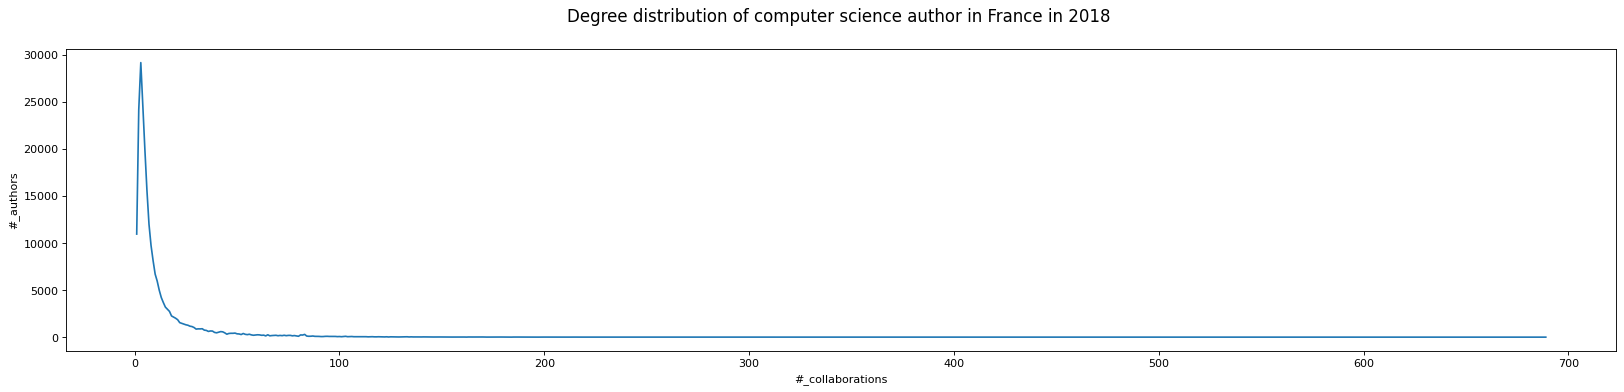

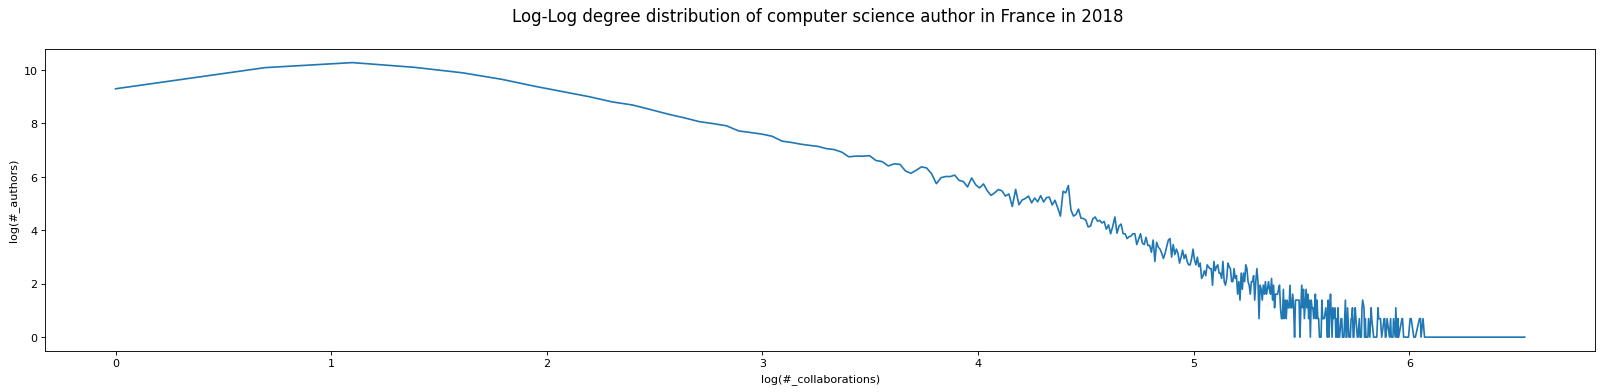

In [2]:
df = pd.read_csv('myDATA/00-collaboration_df.csv')
df = df[df["2018"] != 0 ]
collabs = df["2018"].values

path = 'myDATA/45-degree_distribution'
if not os.path.exists(path):
    os.mkdir(path)

## Degree Distribution for the whole dataset 
distribution = Counter(collabs)
distribution = dict(sorted(distribution.items()))
print(distribution)

x = list(distribution.keys())
y = list(distribution.values())

plt.figure(figsize=(25, 5), dpi=80)
plt.xlabel("#_collaborations")
plt.ylabel("#_authors")
plt.title("Degree distribution of computer science author in France in 2018 \n", fontdict = {'fontsize' : 15})
plt.plot(x,y)

# save image
file = path+'/degreeDist'
plt.savefig(file)

plt.show()

# log log degree distribution for the whole dataset 
plt.figure(figsize=(25, 5), dpi=80)
plt.xlabel("log(#_collaborations)")
plt.ylabel("log(#_authors)")
plt.title("Log-Log degree distribution of computer science author in France in 2018 \n", fontdict = {'fontsize' : 15})
plt.plot(np.log(x),np.log(y))

# save image
file = path+'/log_log_degreeDist'
plt.savefig(file)

plt.show()

================================================================ HOLE SIZE 0 =================================================================


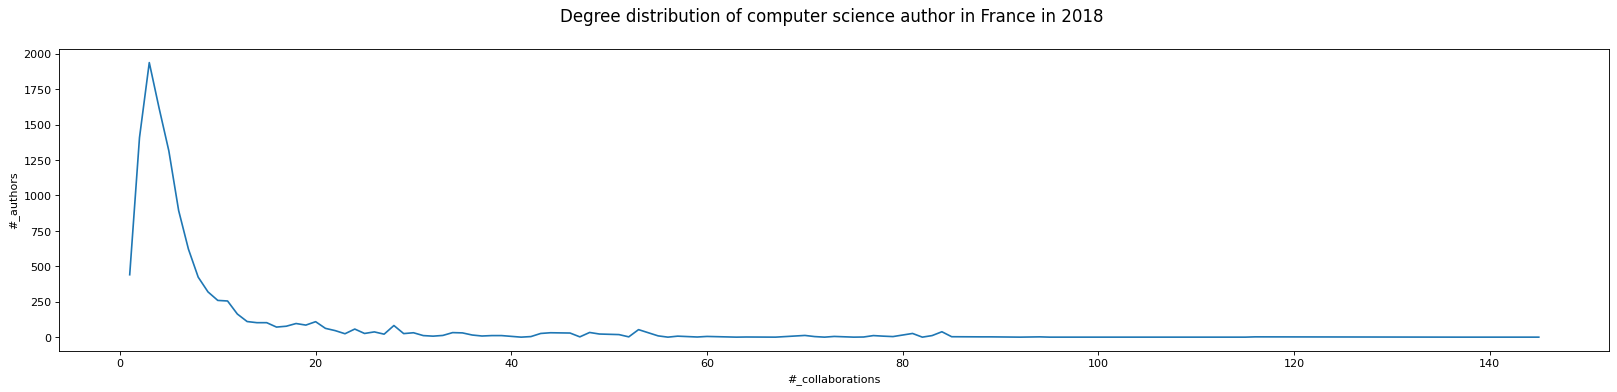

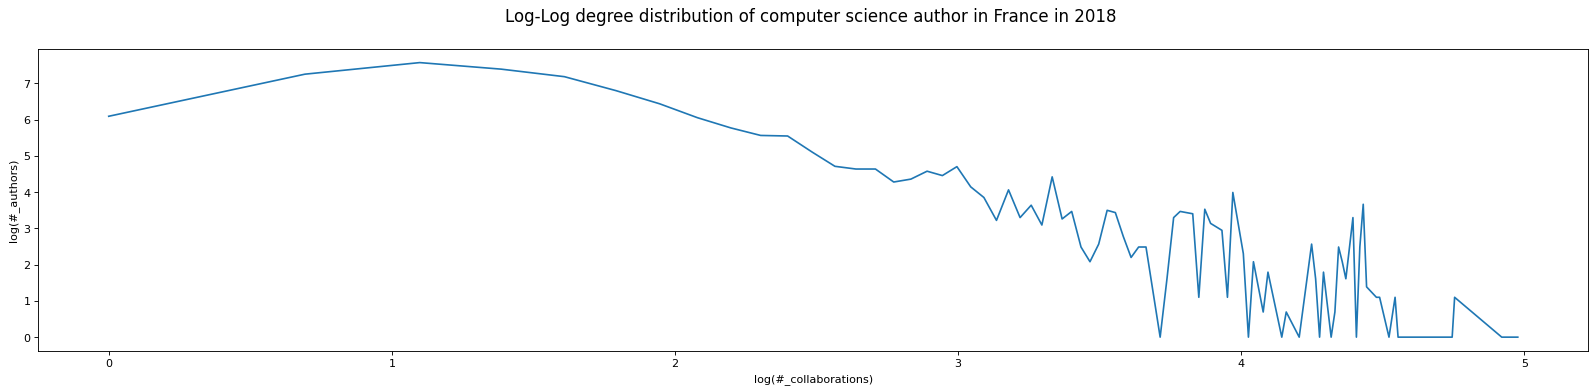

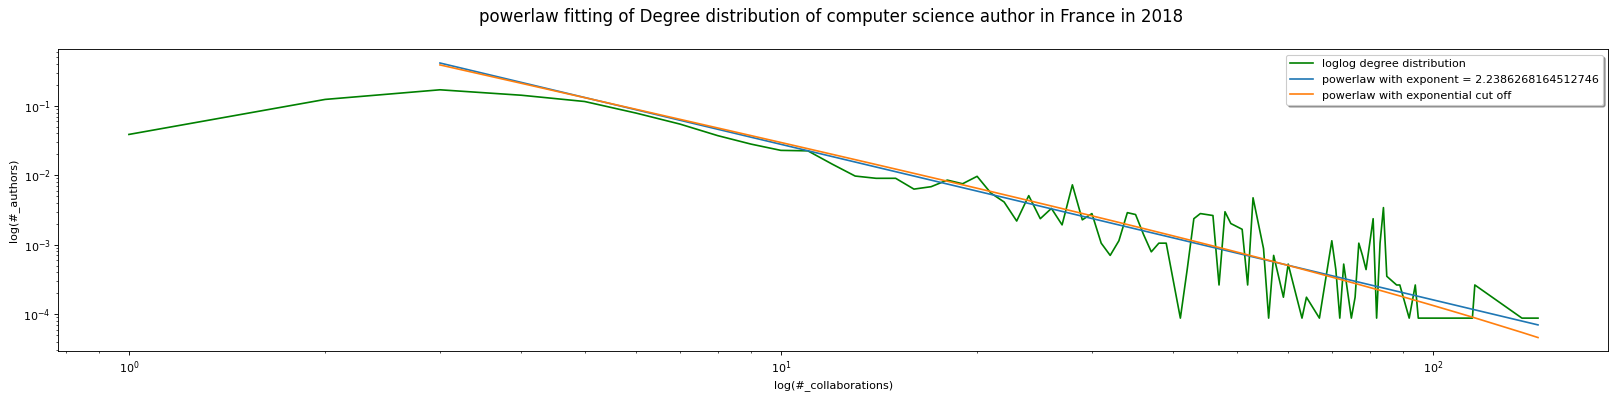

================================================================ HOLE SIZE 1 =================================================================


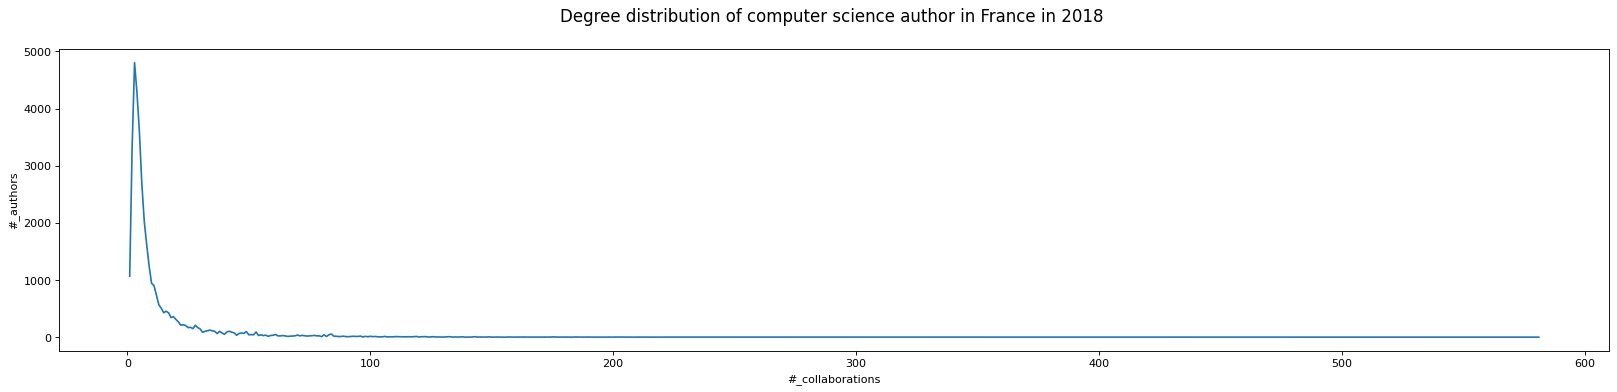

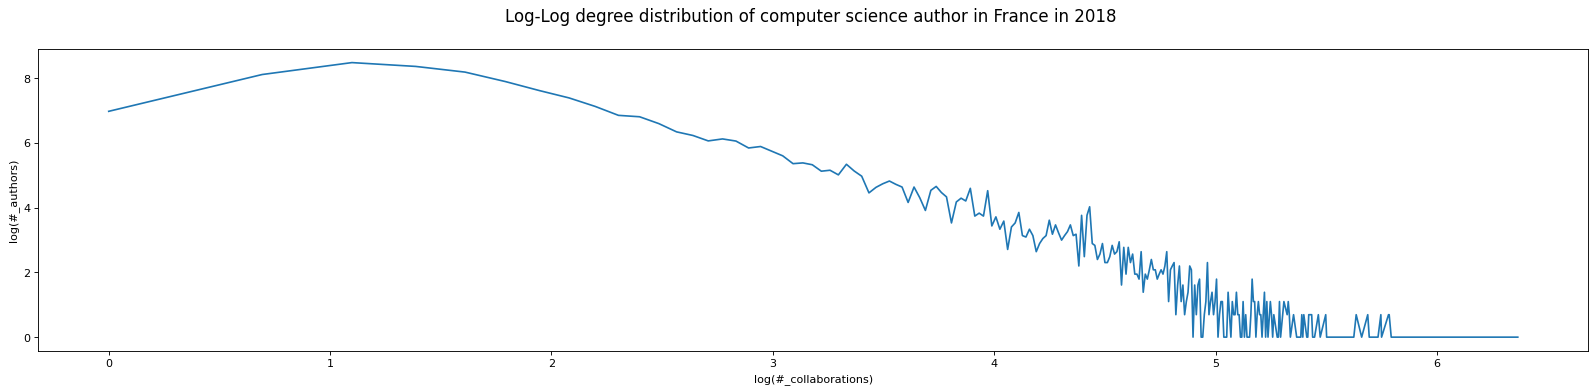

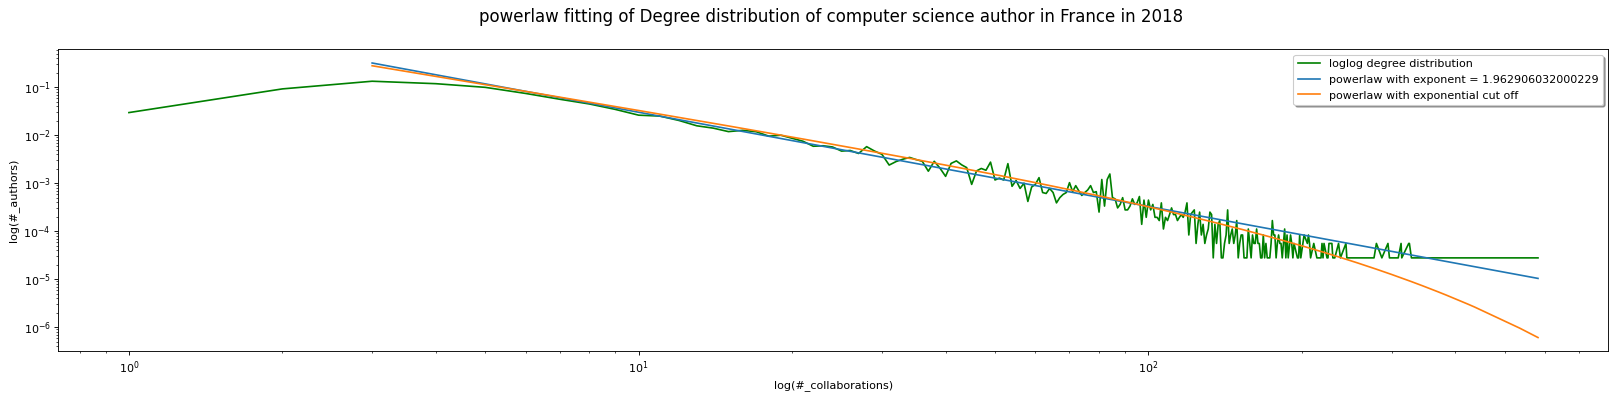

================================================================ HOLE SIZE 2 =================================================================


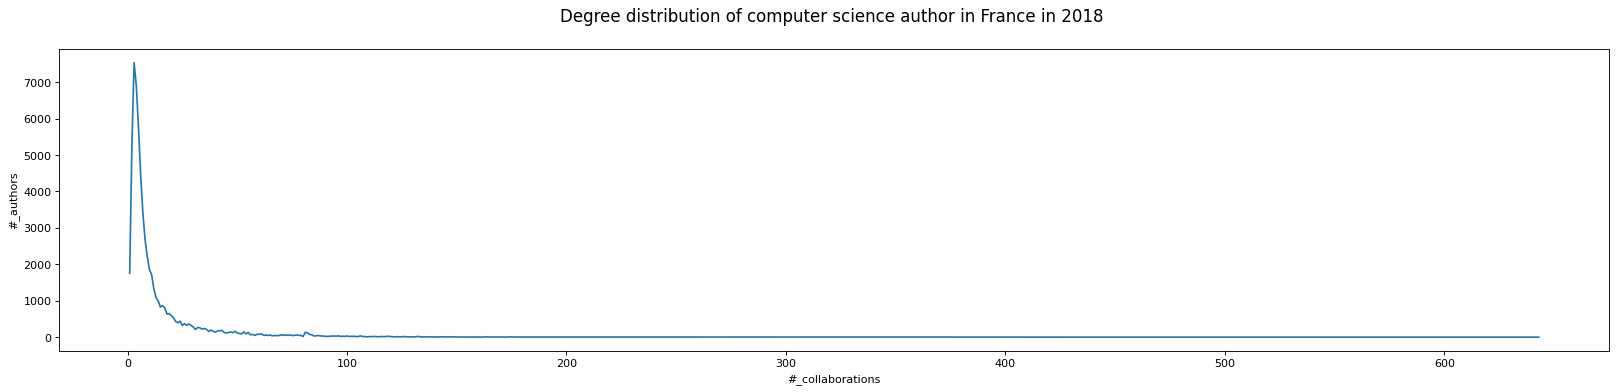

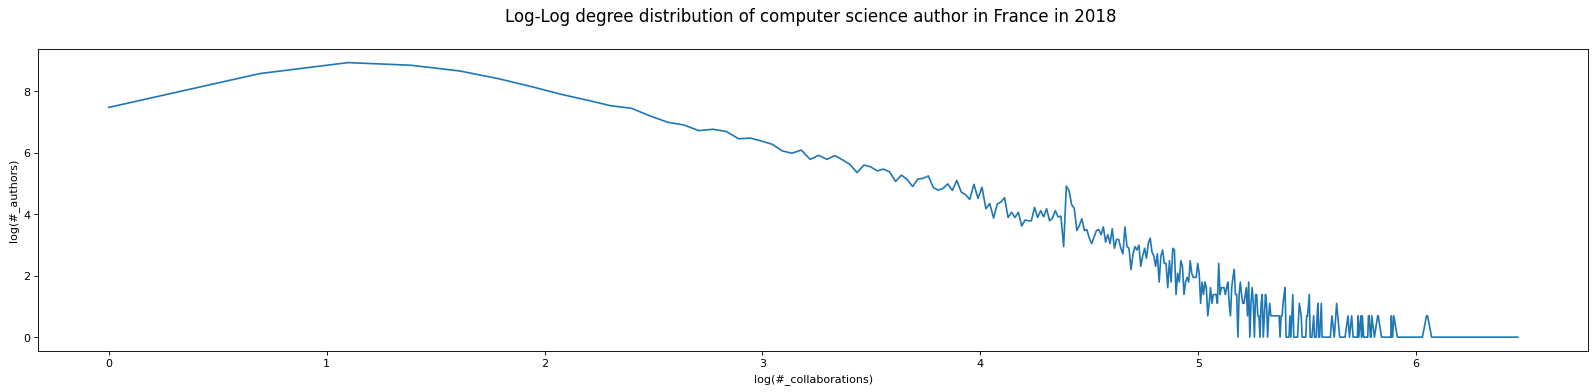

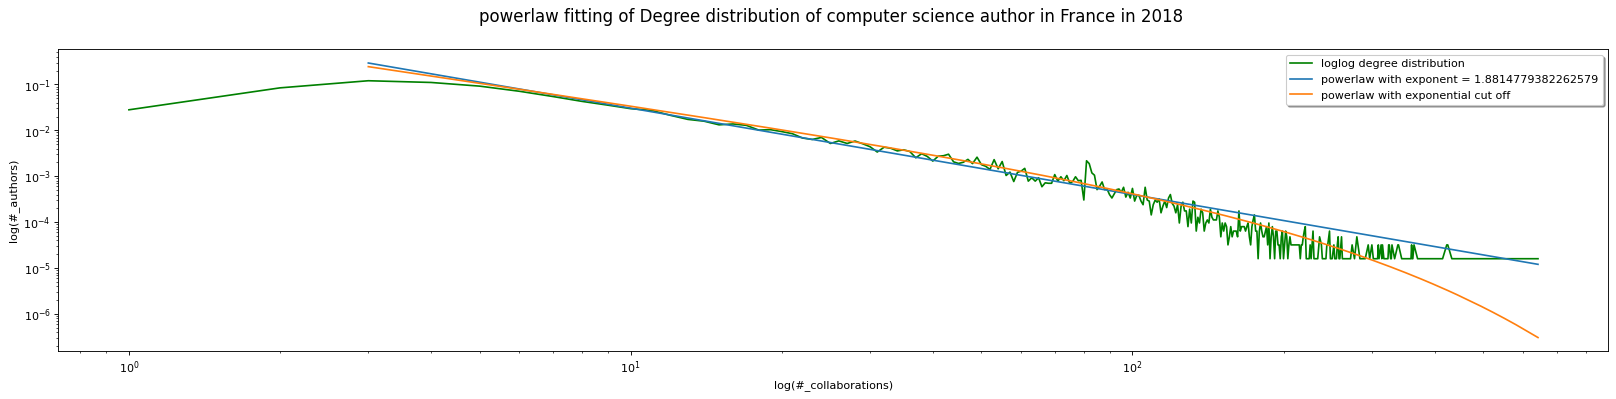

================================================================ HOLE SIZE 3 =================================================================


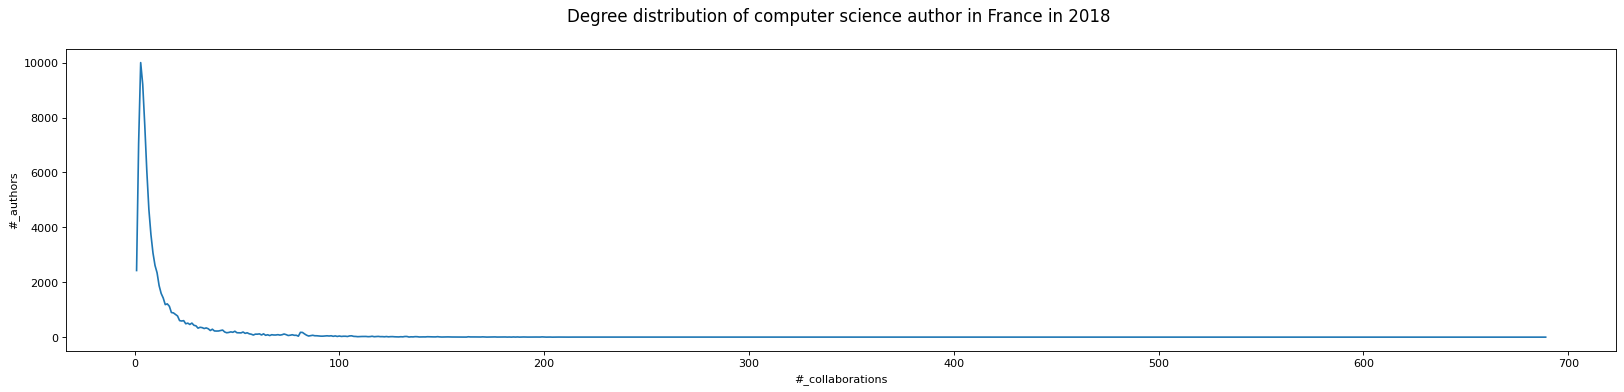

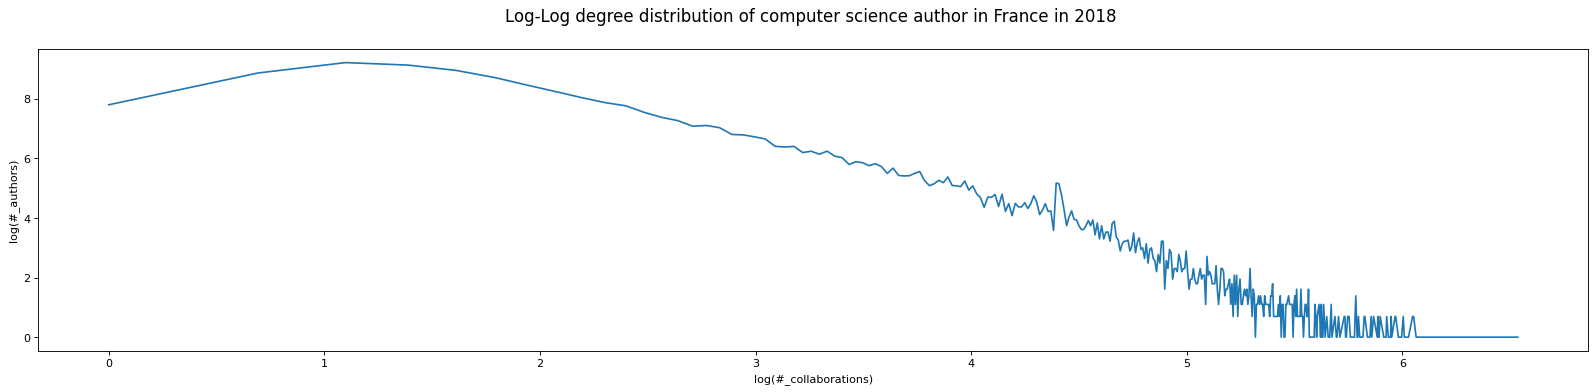

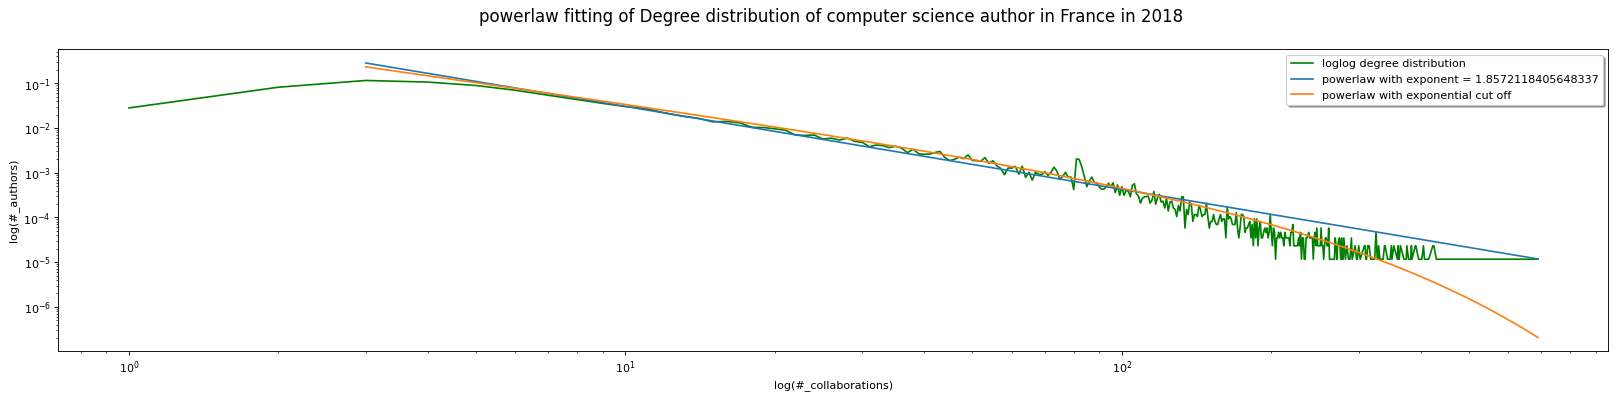

================================================================ HOLE SIZE 4 =================================================================


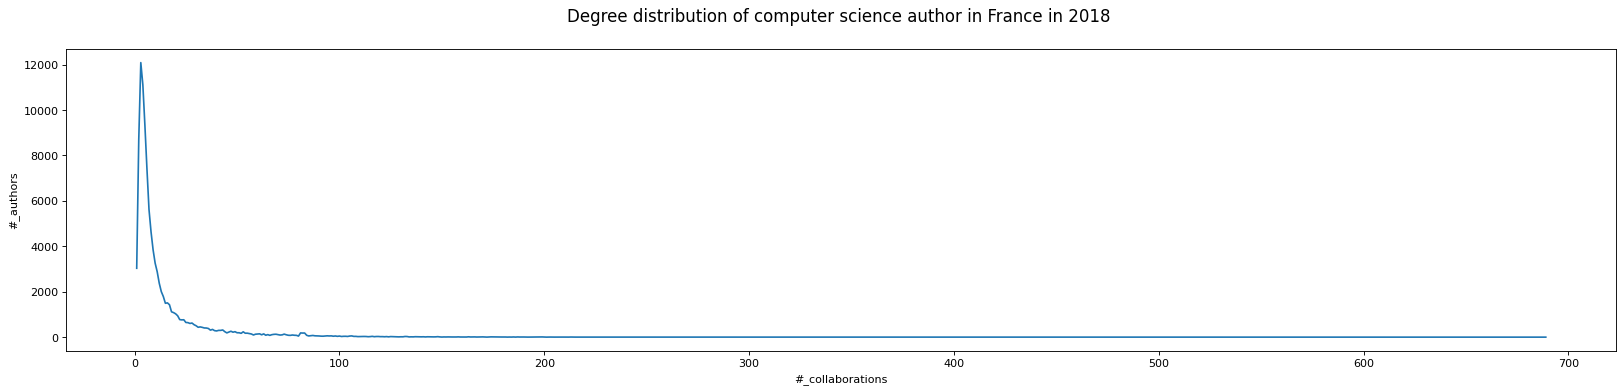

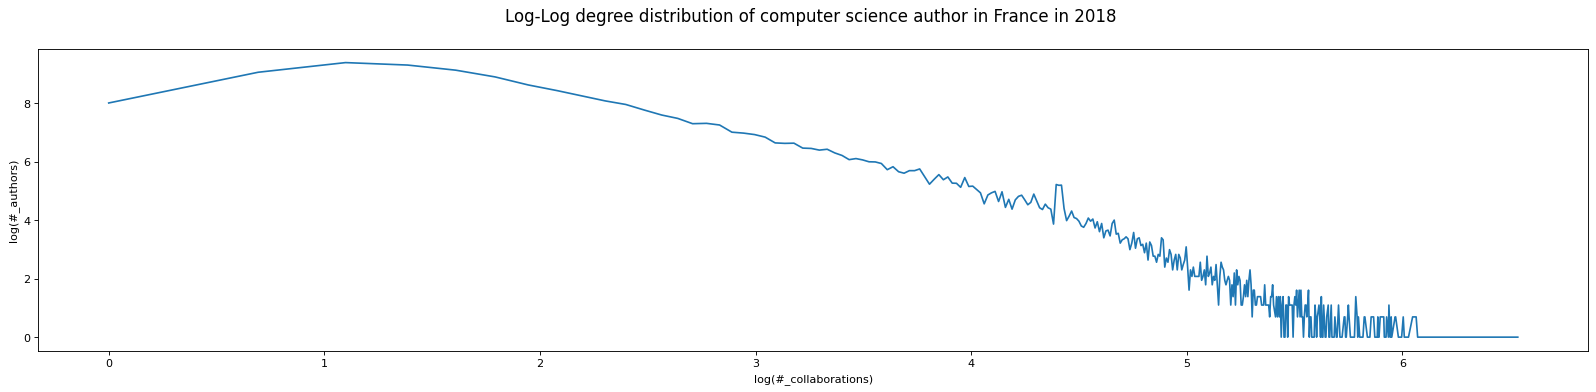

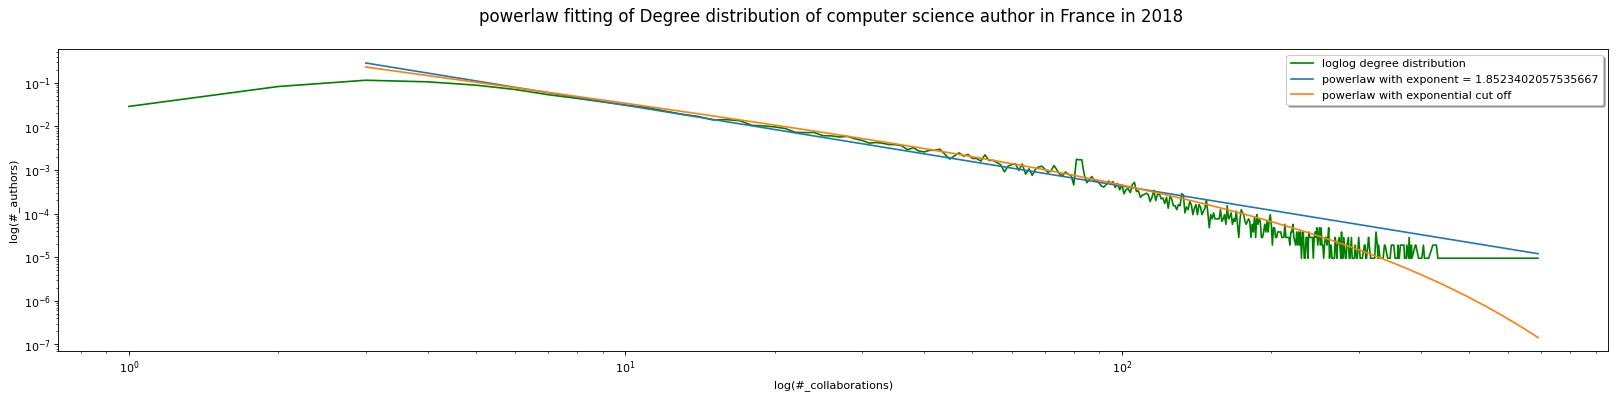

================================================================ HOLE SIZE 5 =================================================================


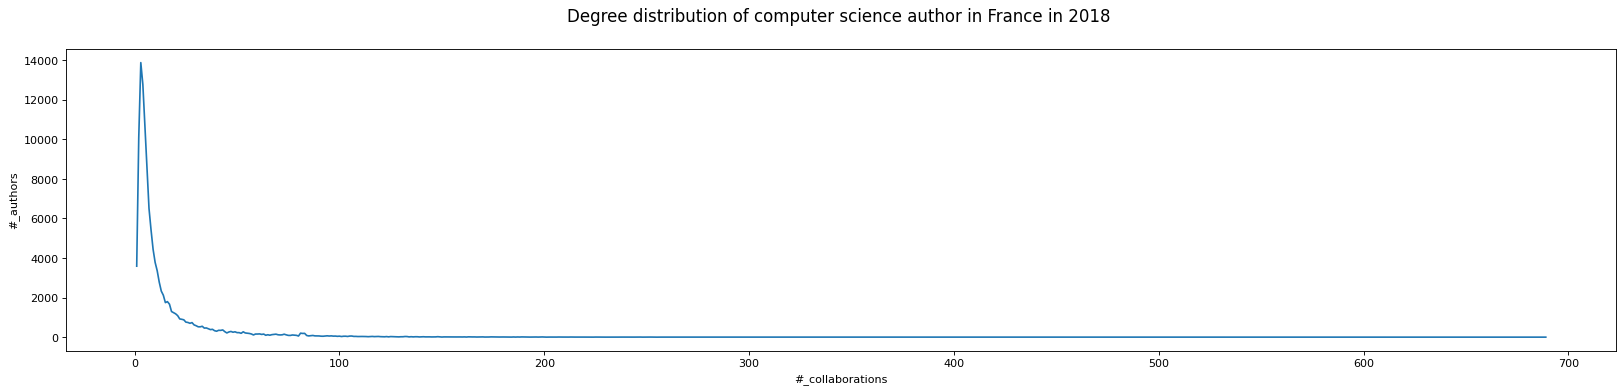

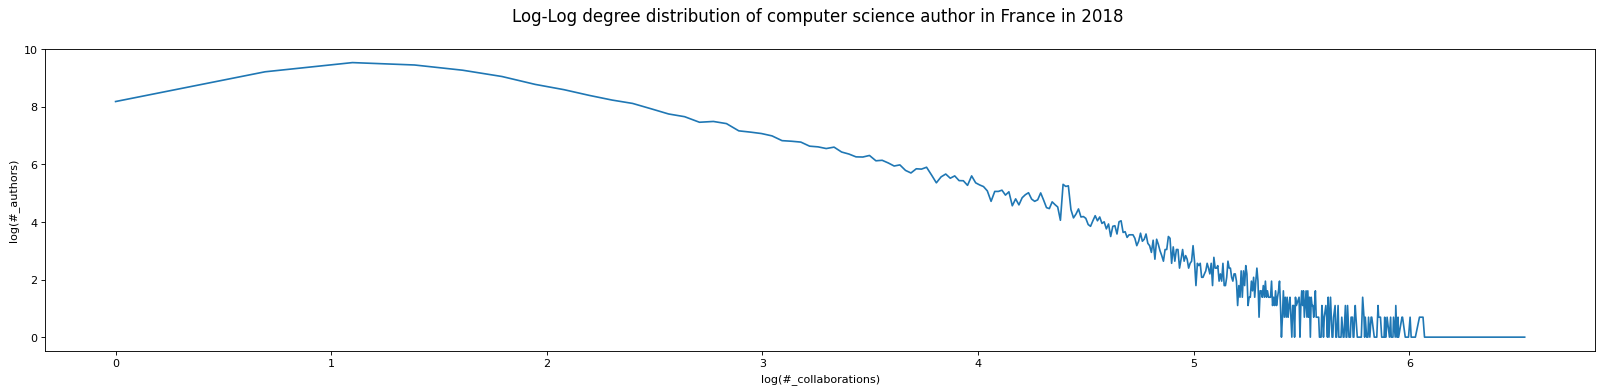

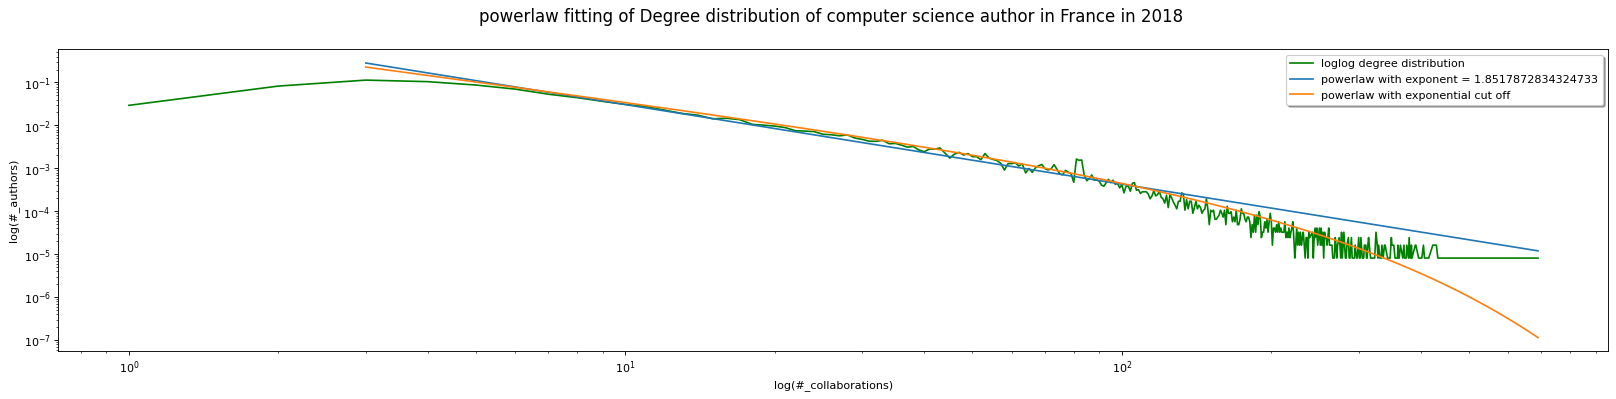

================================================================ HOLE SIZE 6 =================================================================


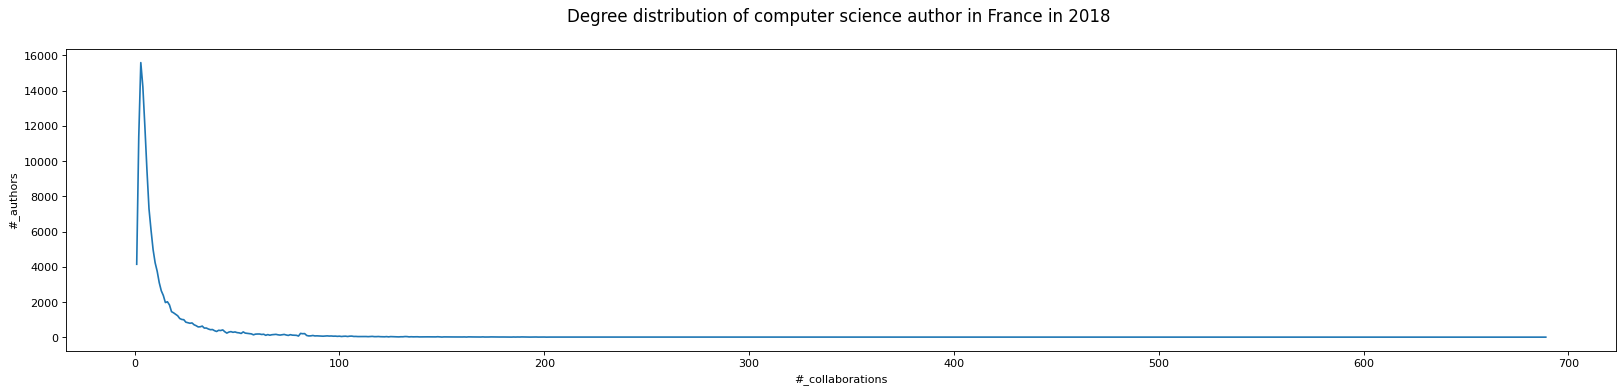

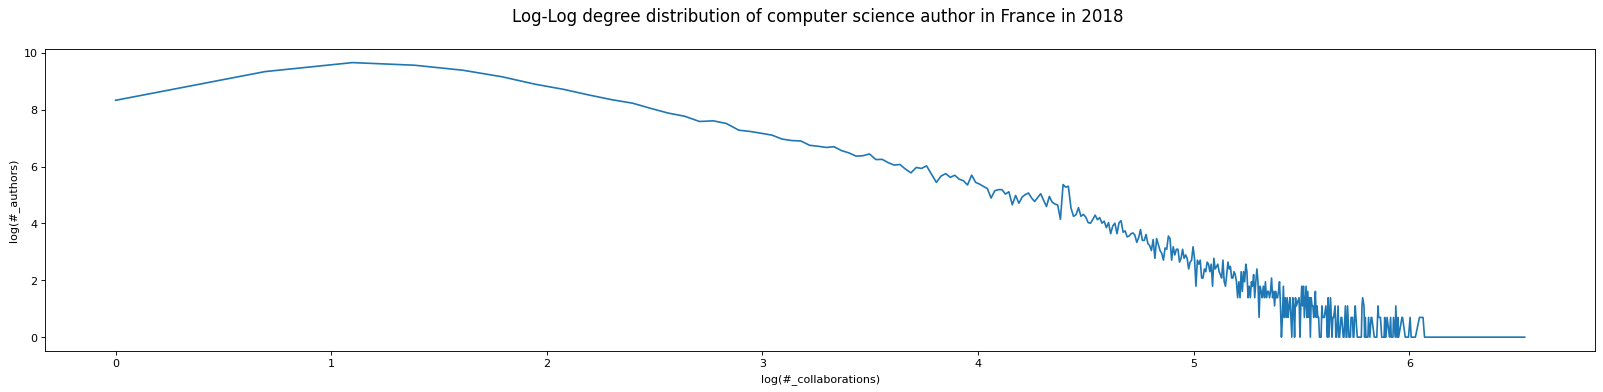

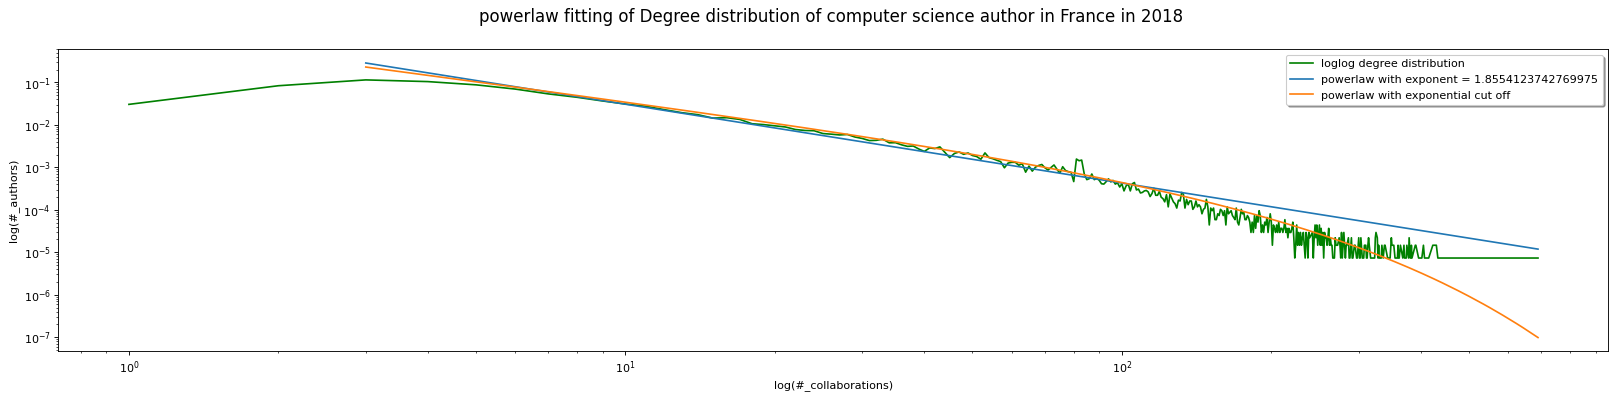

================================================================ HOLE SIZE 7 =================================================================


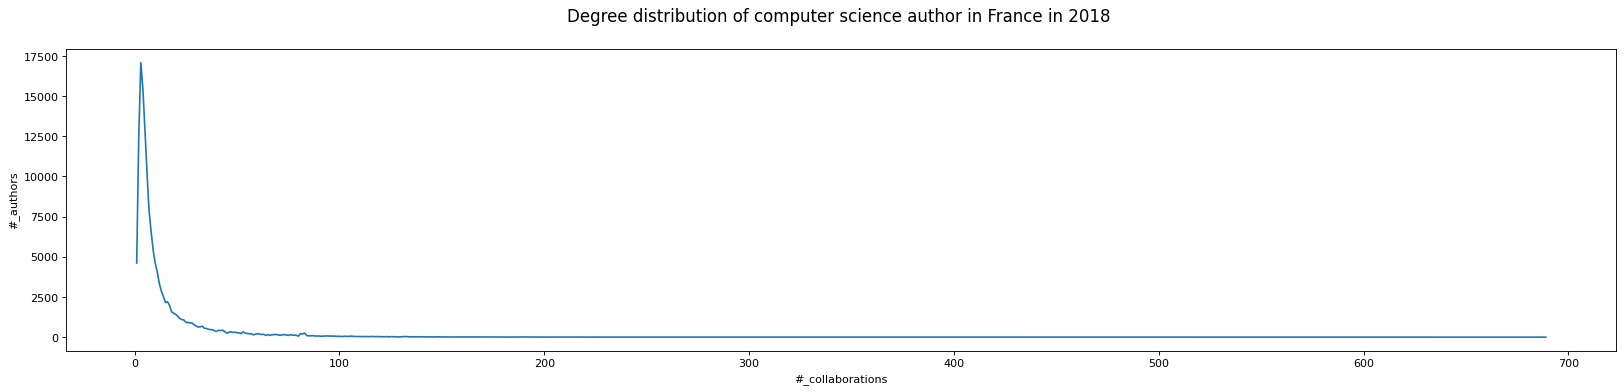

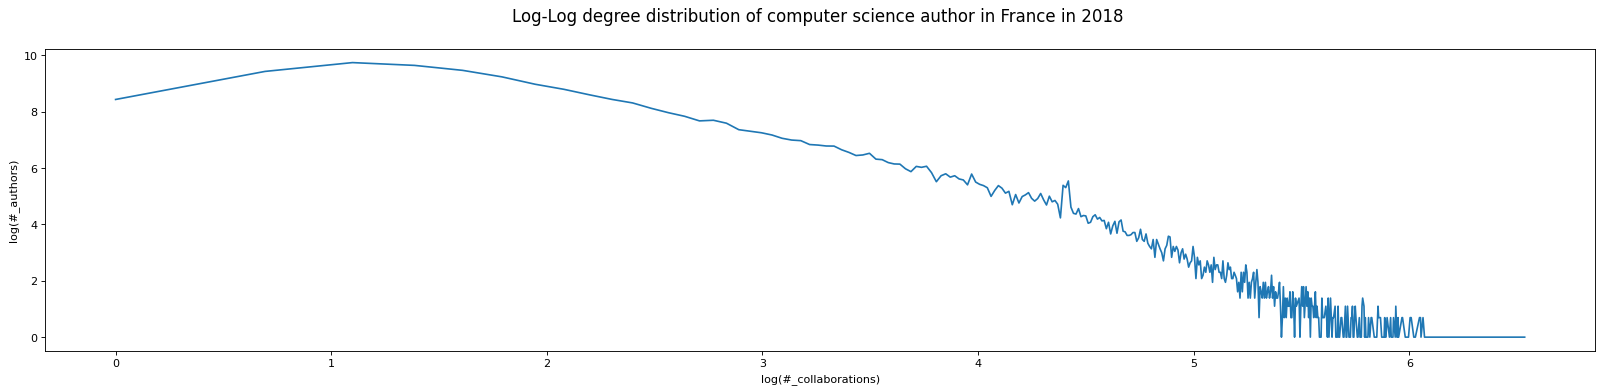

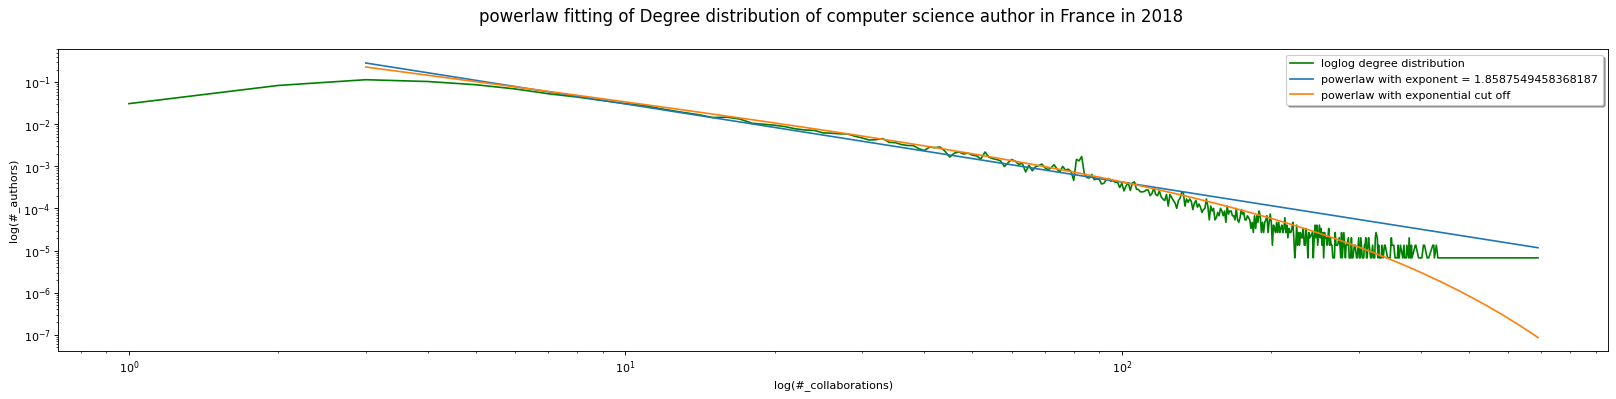

================================================================ HOLE SIZE 8 =================================================================


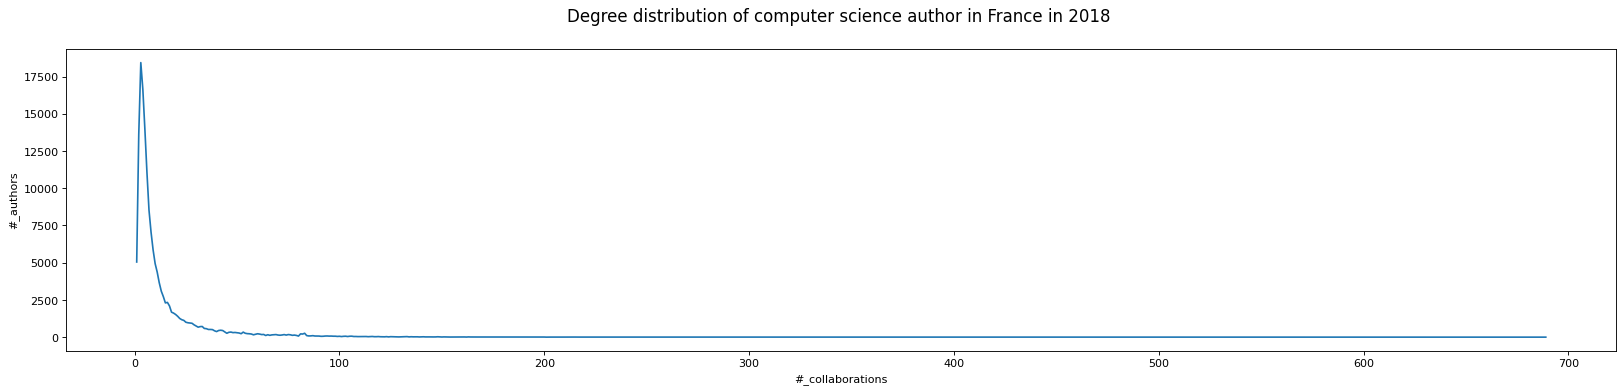

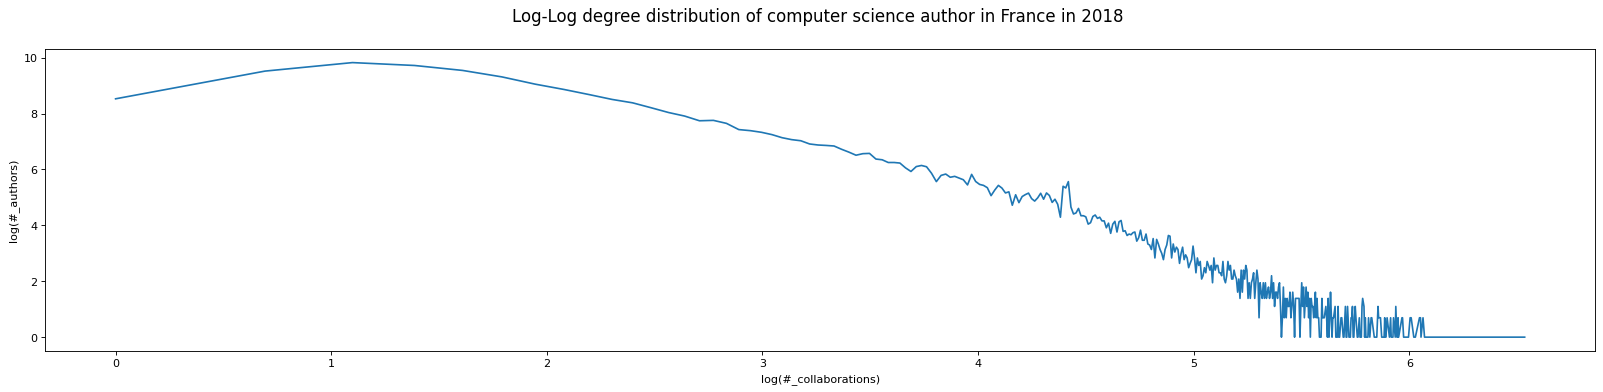

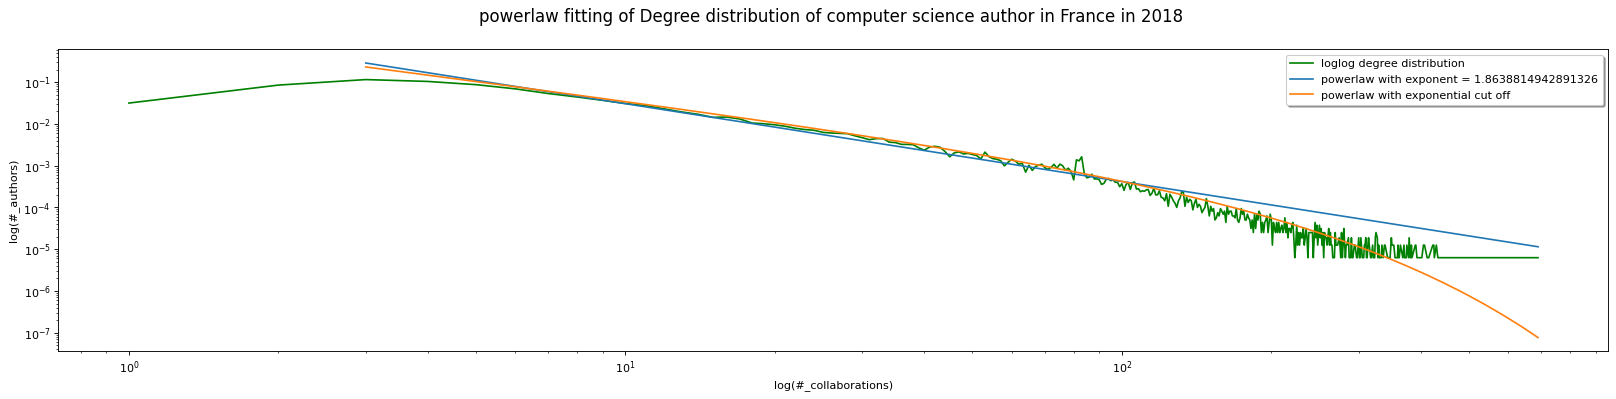

================================================================ HOLE SIZE 9 =================================================================


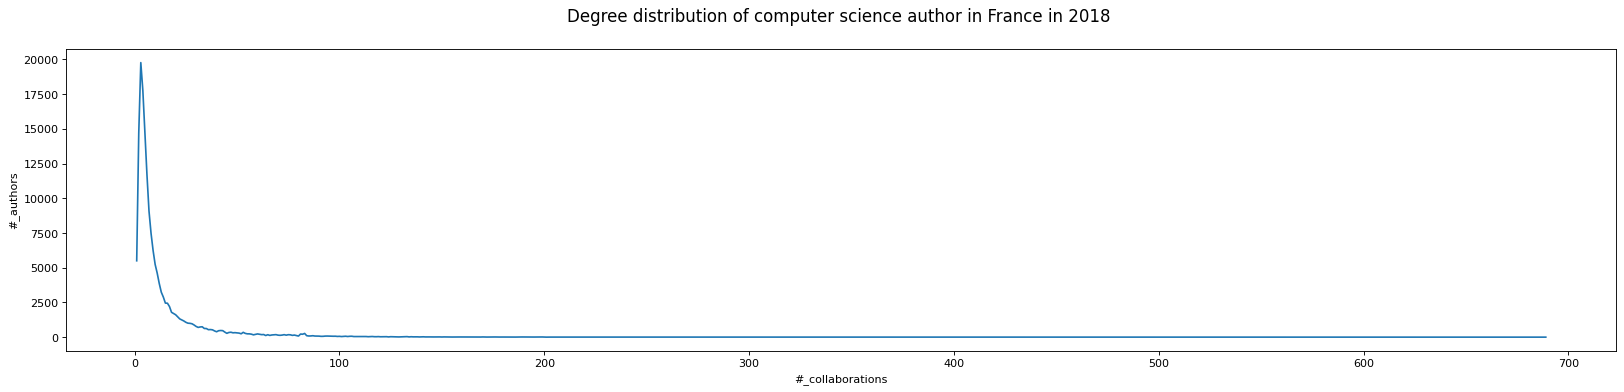

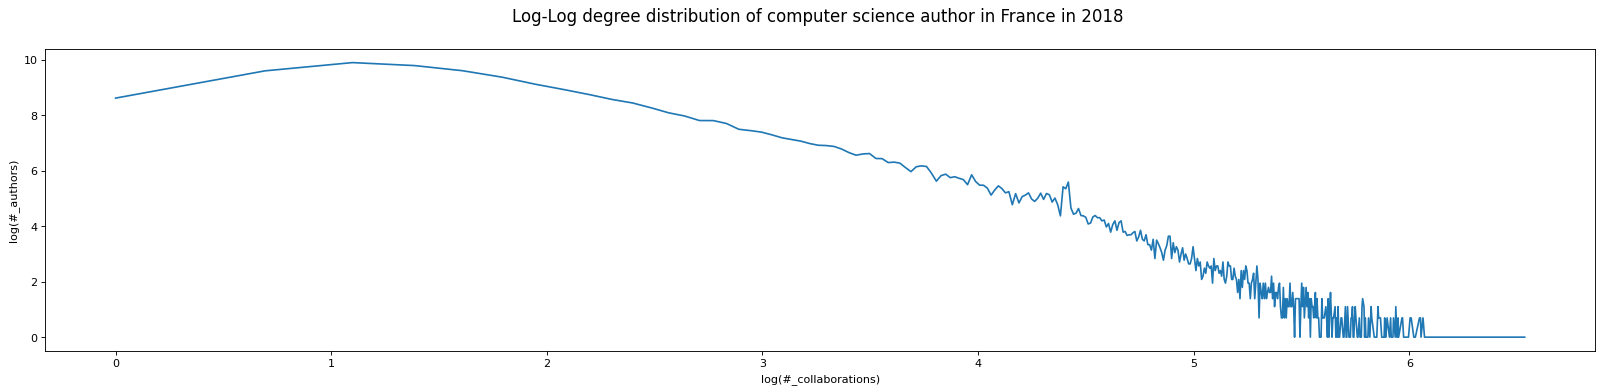

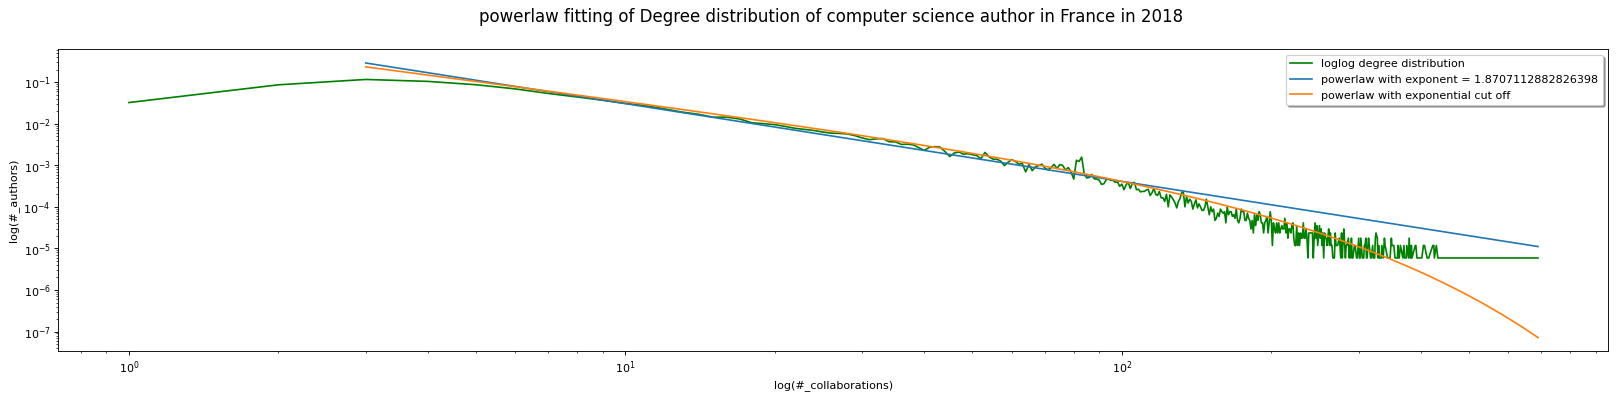

================================================================ HOLE SIZE 10 ================================================================


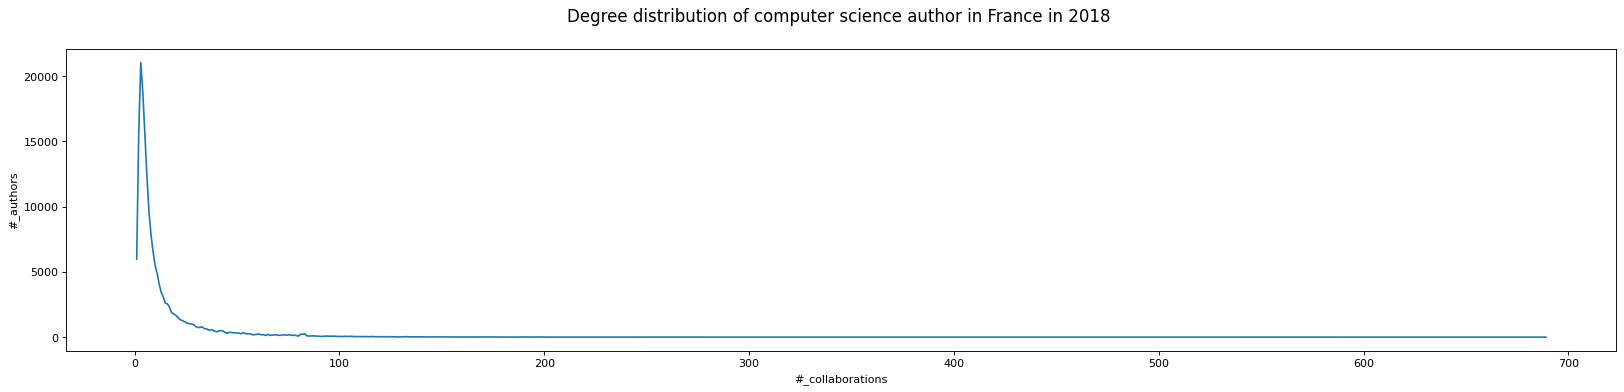

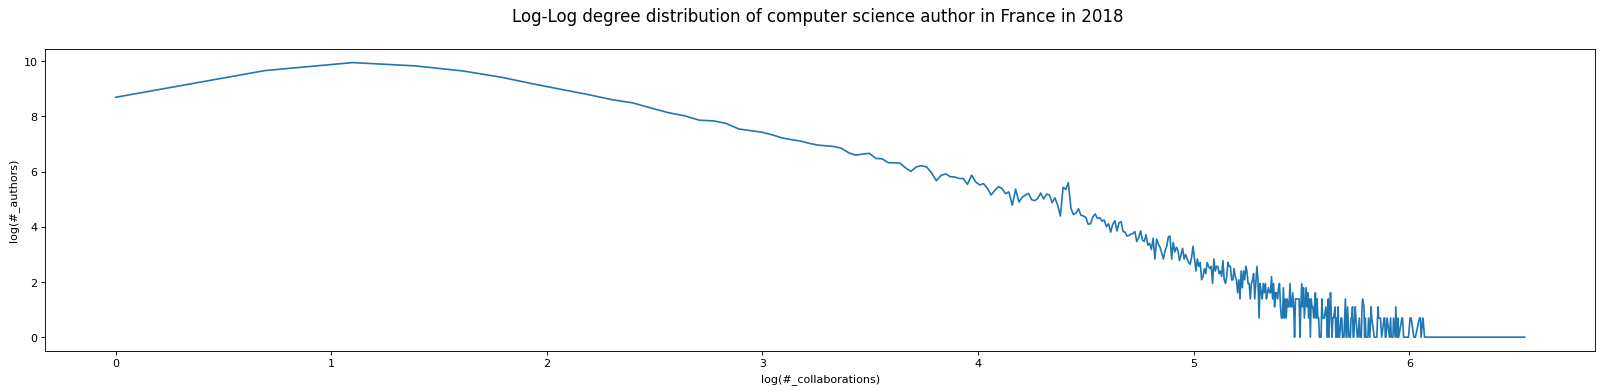

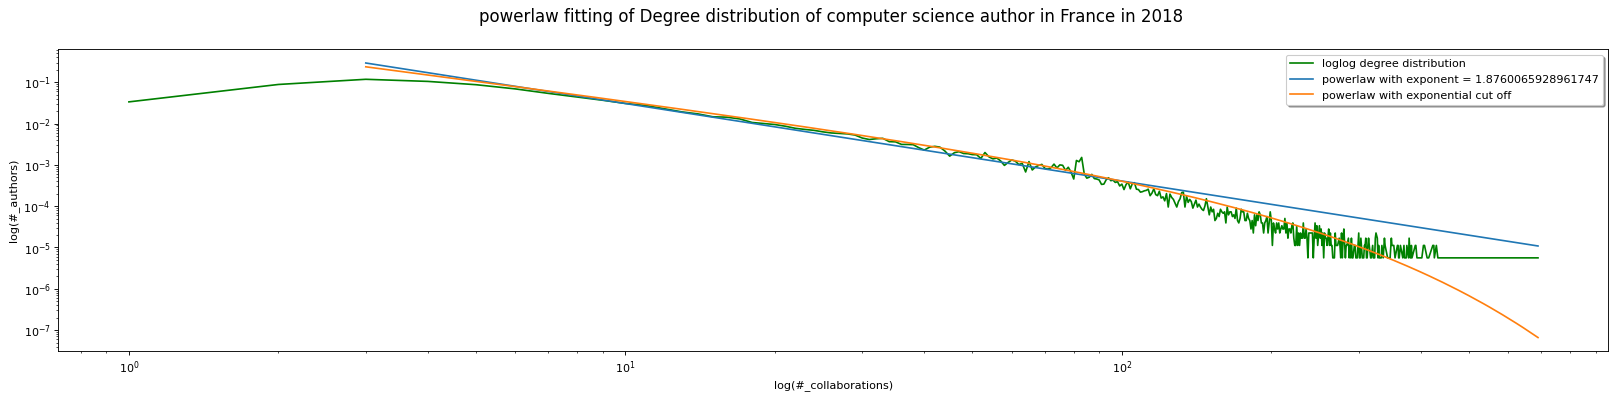

================================================================ HOLE SIZE 11 ================================================================


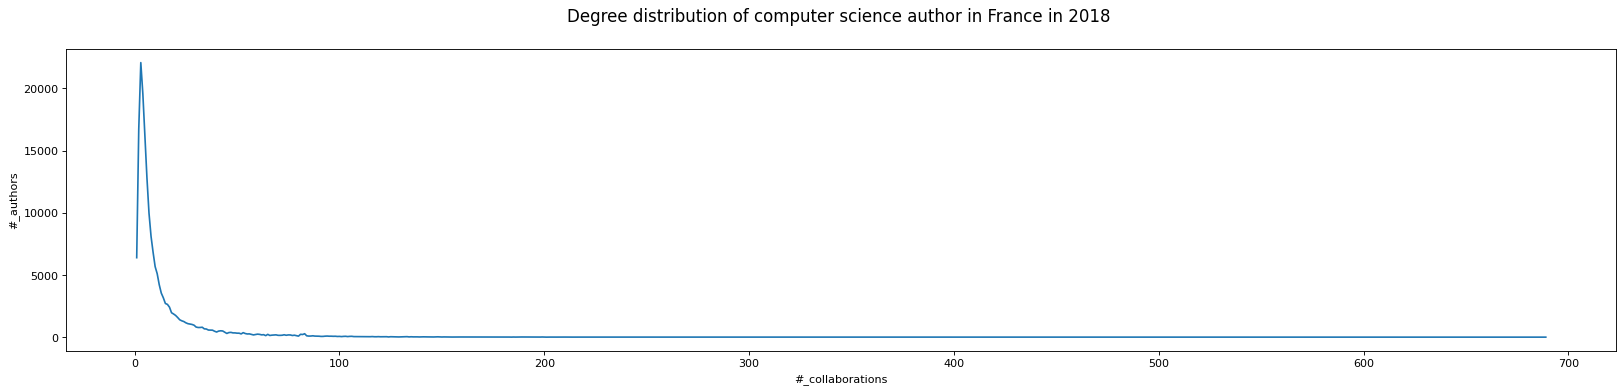

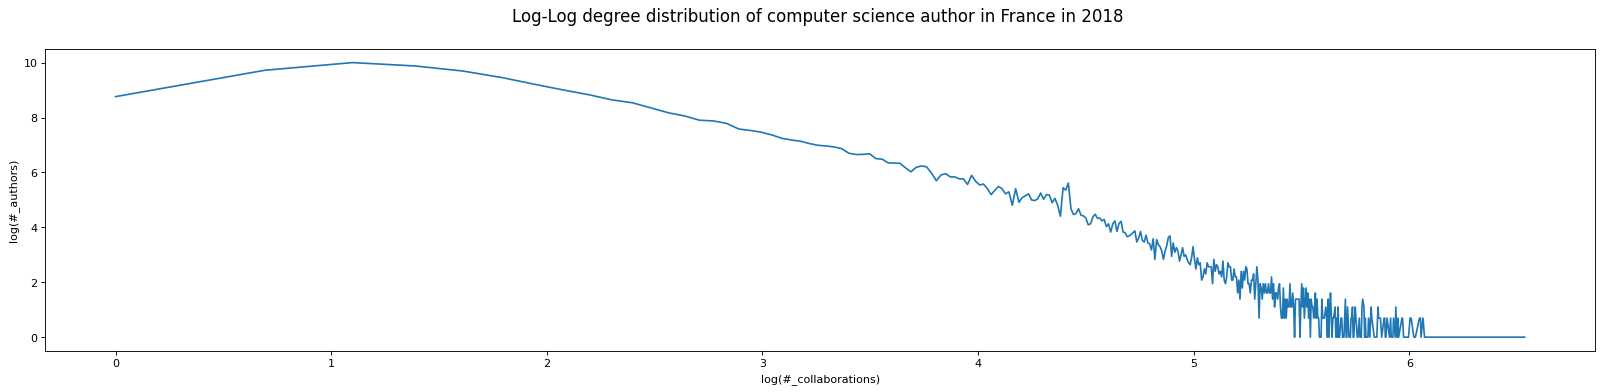

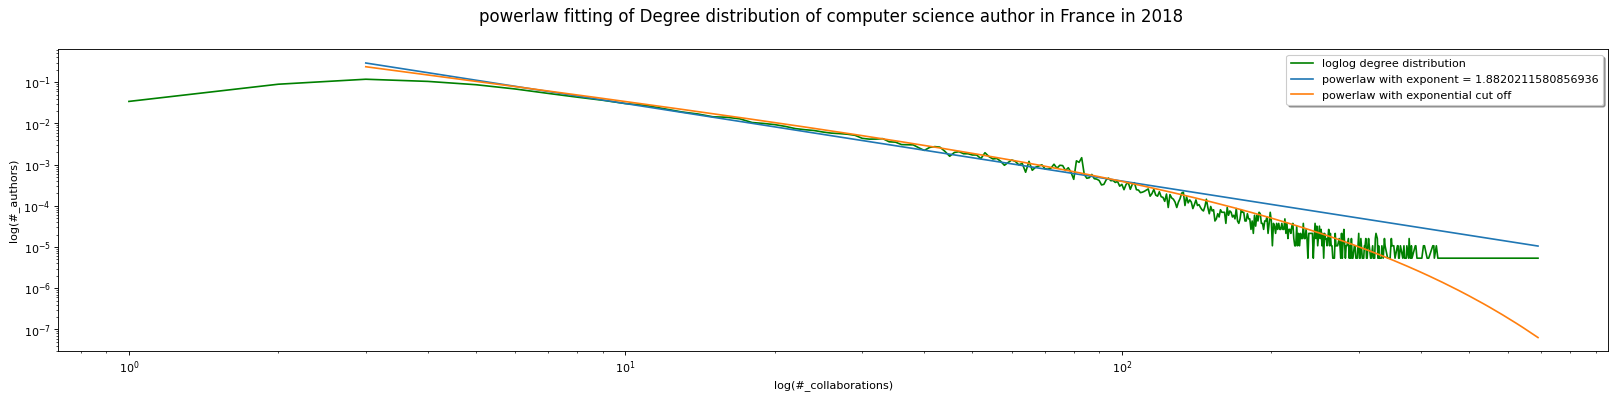

================================================================ HOLE SIZE 12 ================================================================


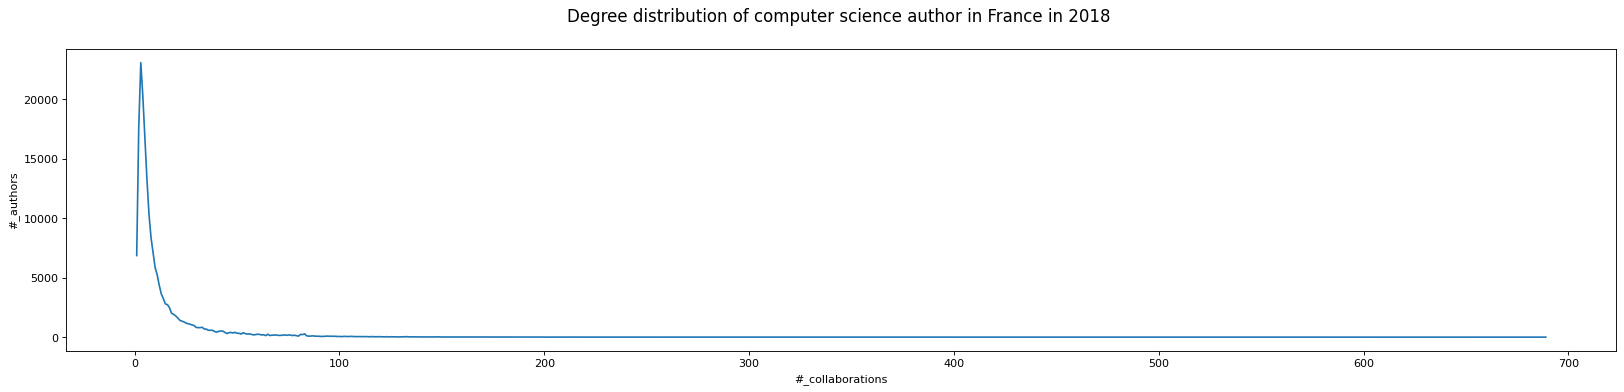

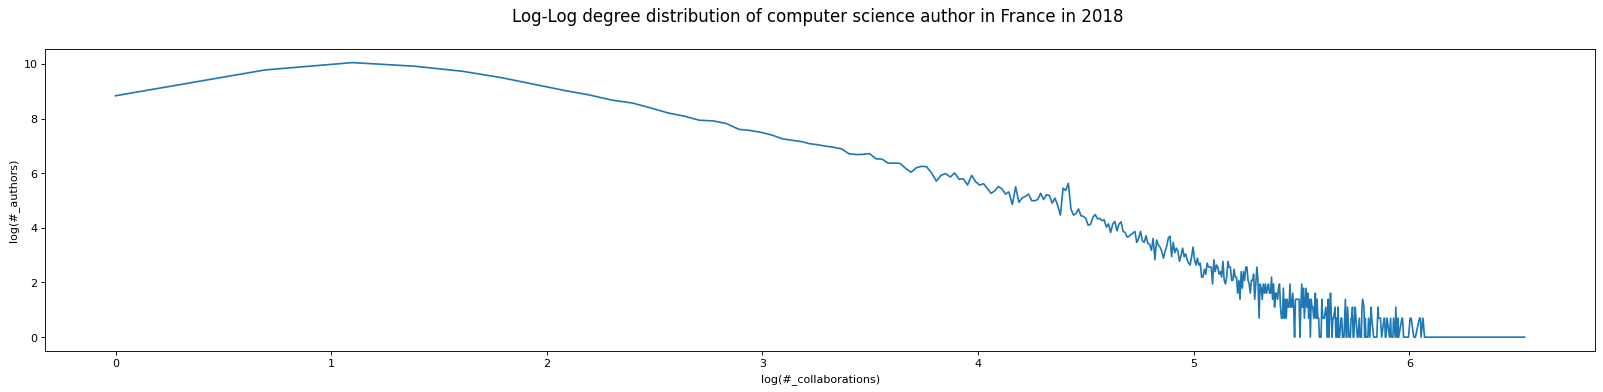

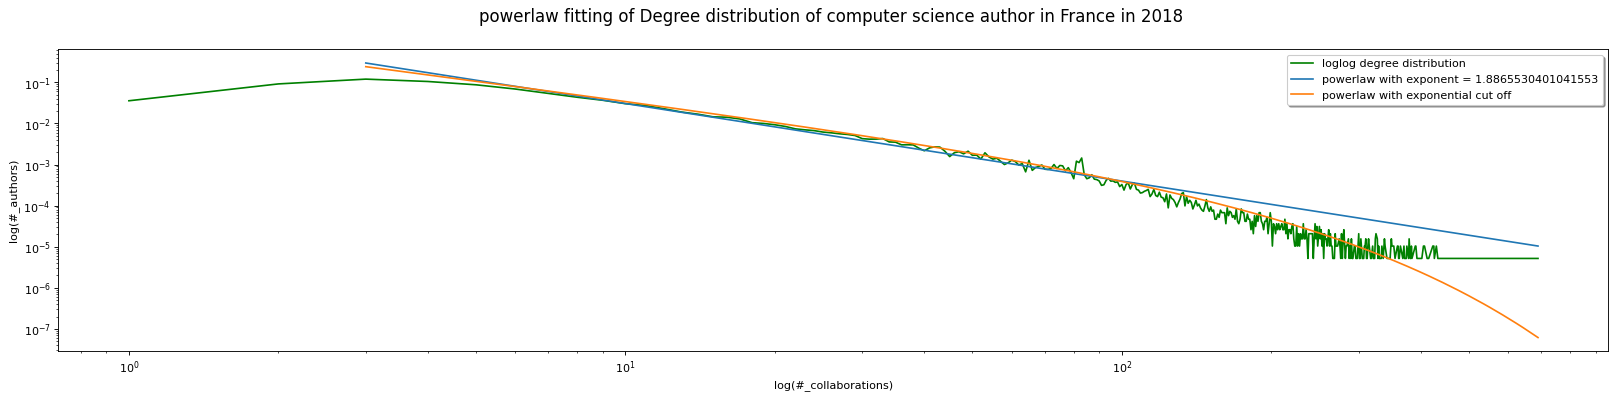

================================================================ HOLE SIZE 13 ================================================================


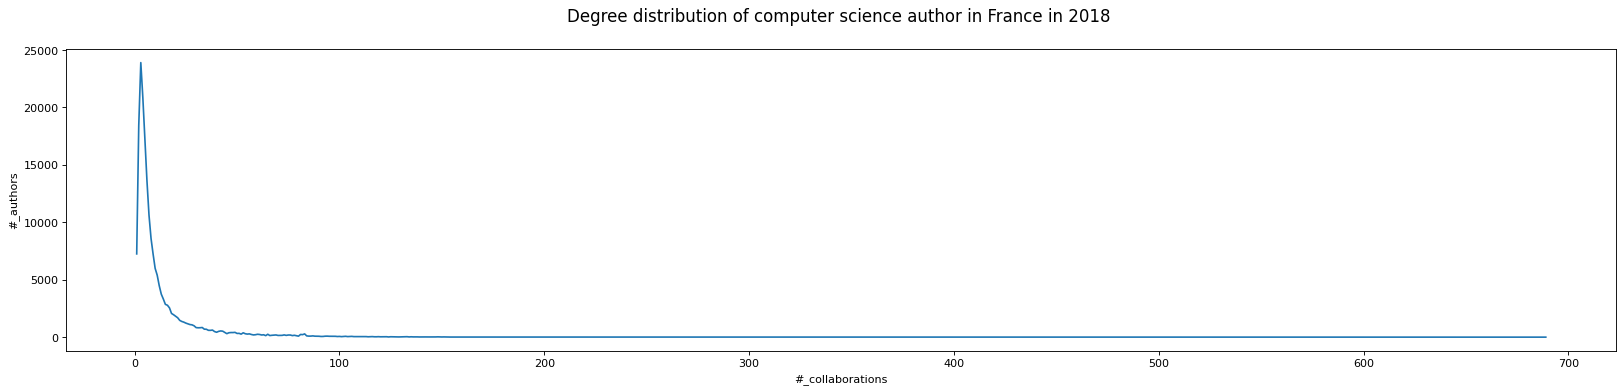

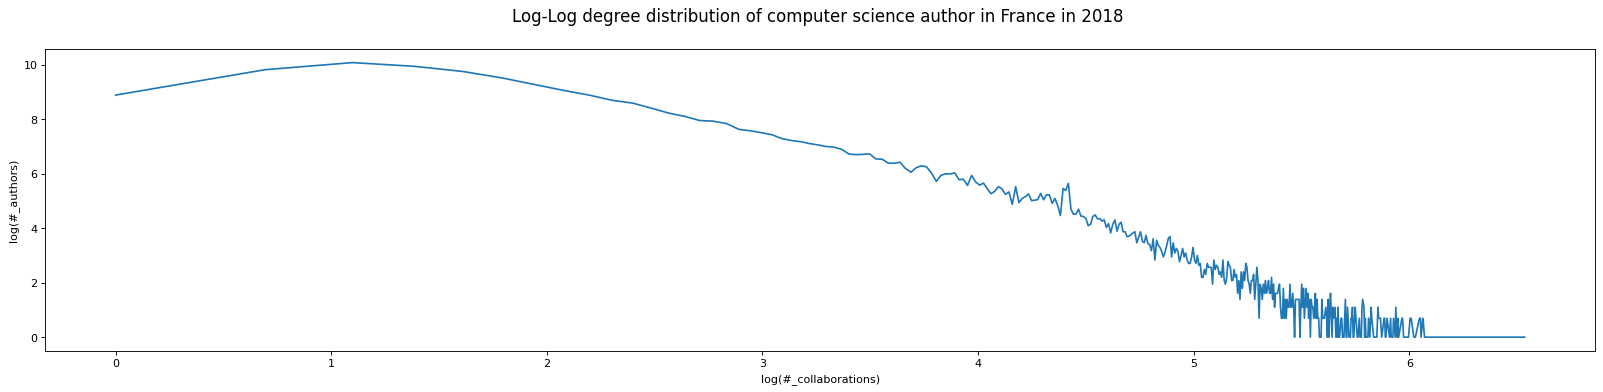

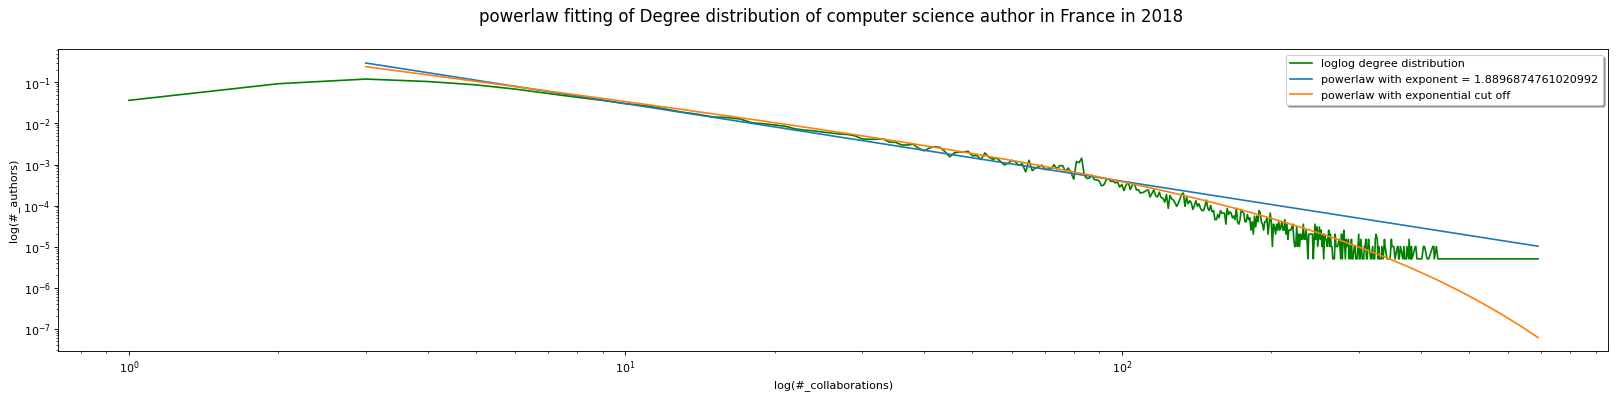

================================================================ HOLE SIZE 14 ================================================================


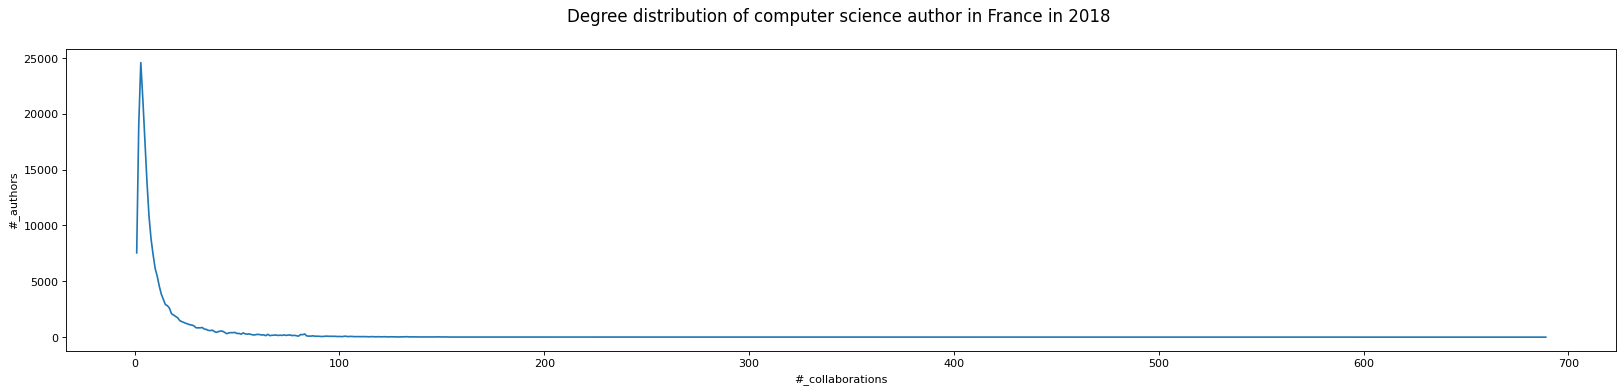

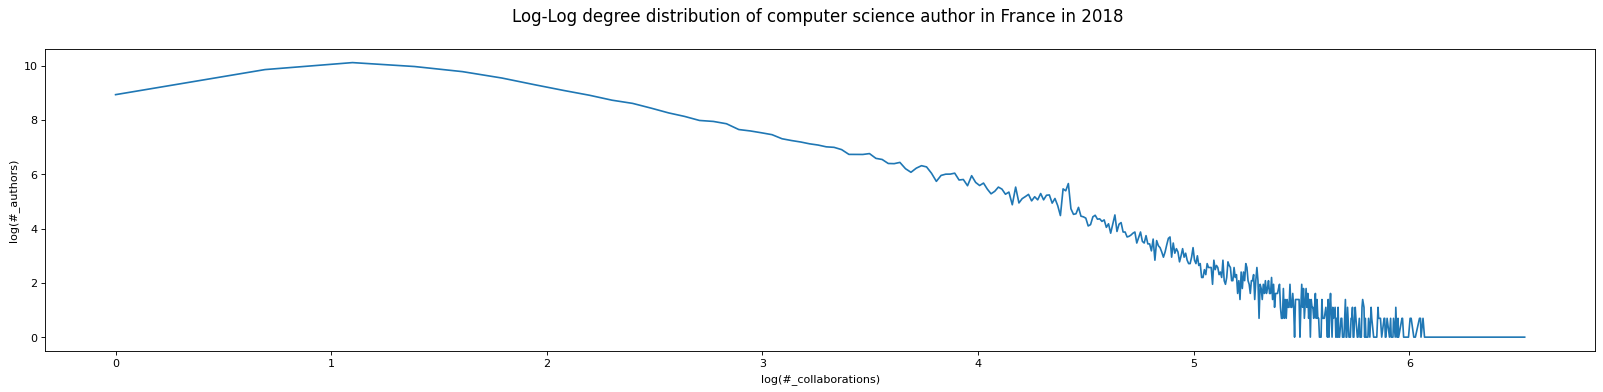

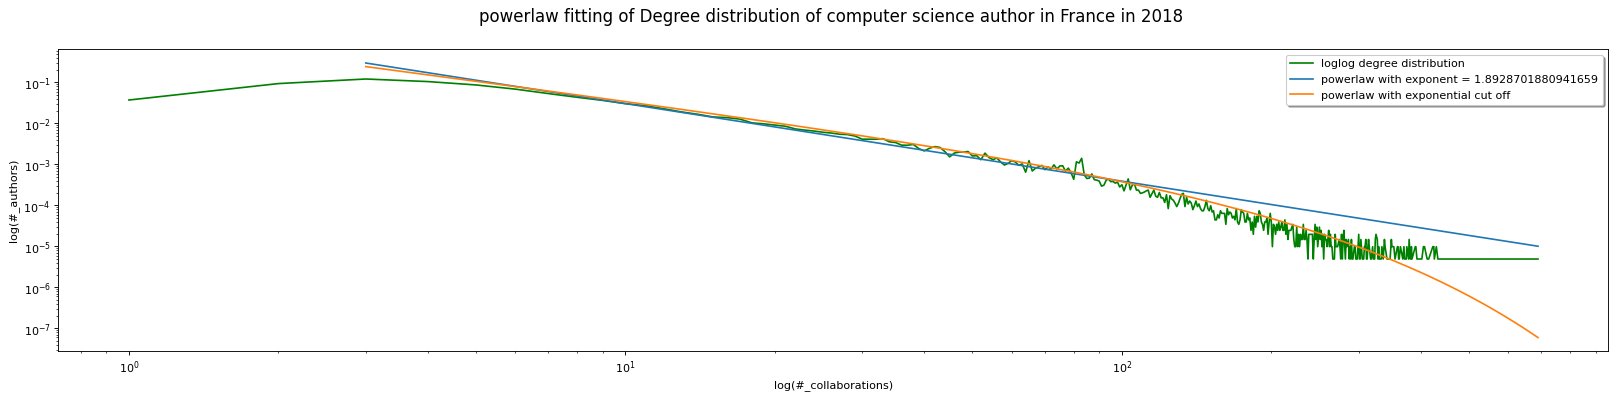

================================================================ HOLE SIZE 15 ================================================================


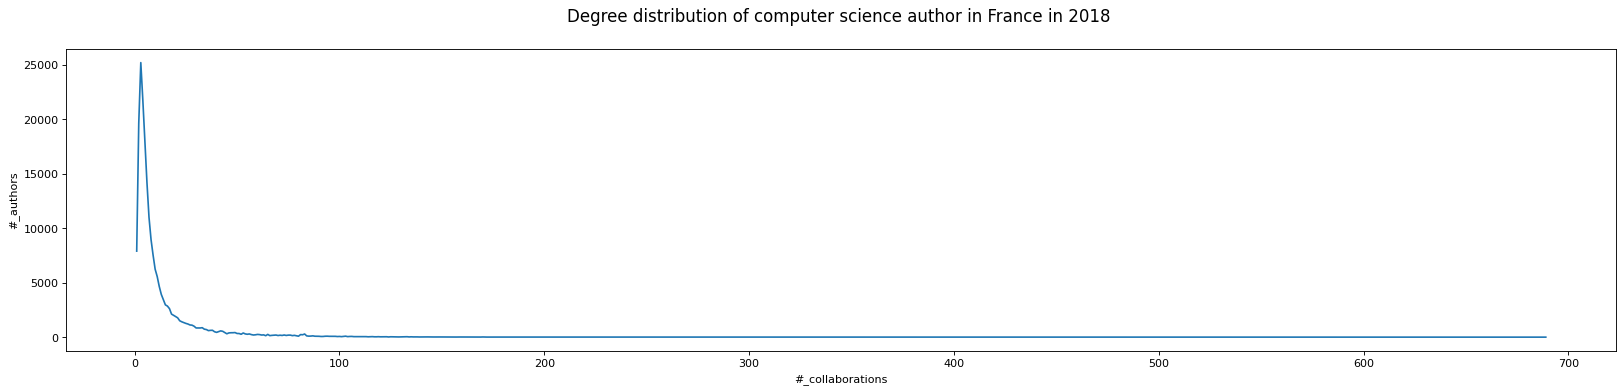

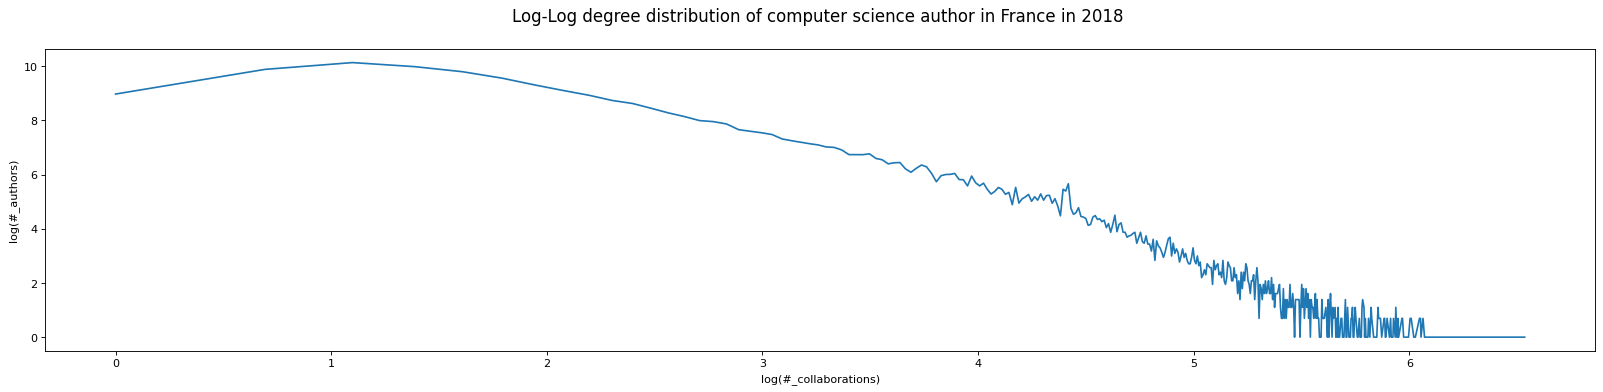

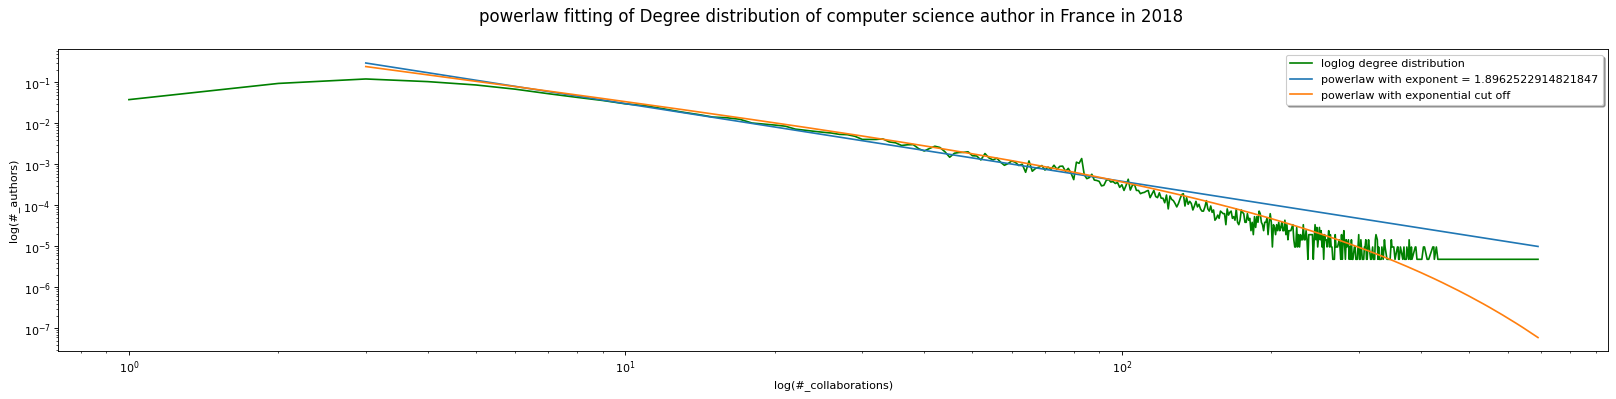

================================================================ HOLE SIZE 16 ================================================================


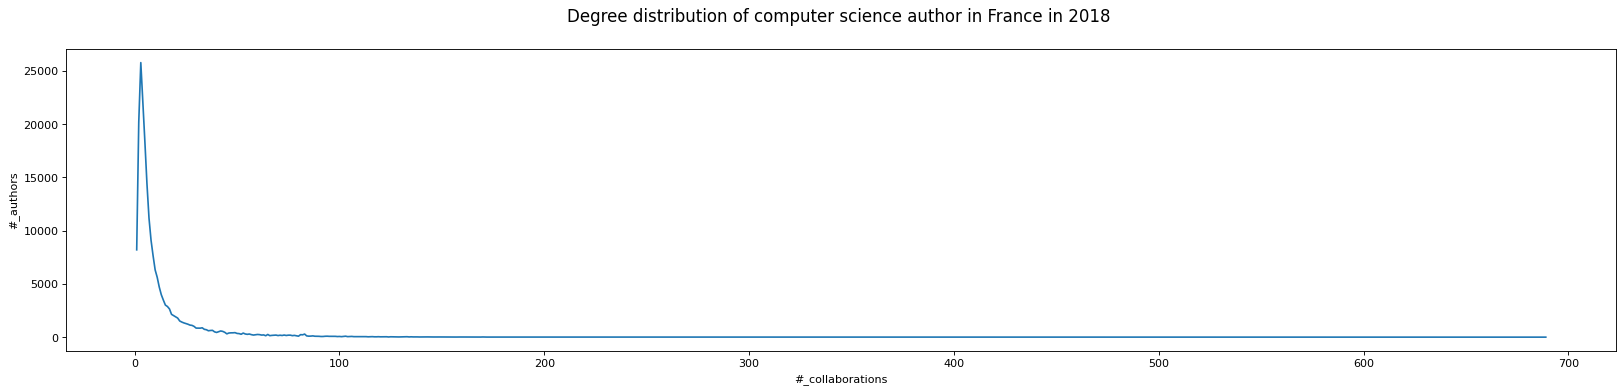

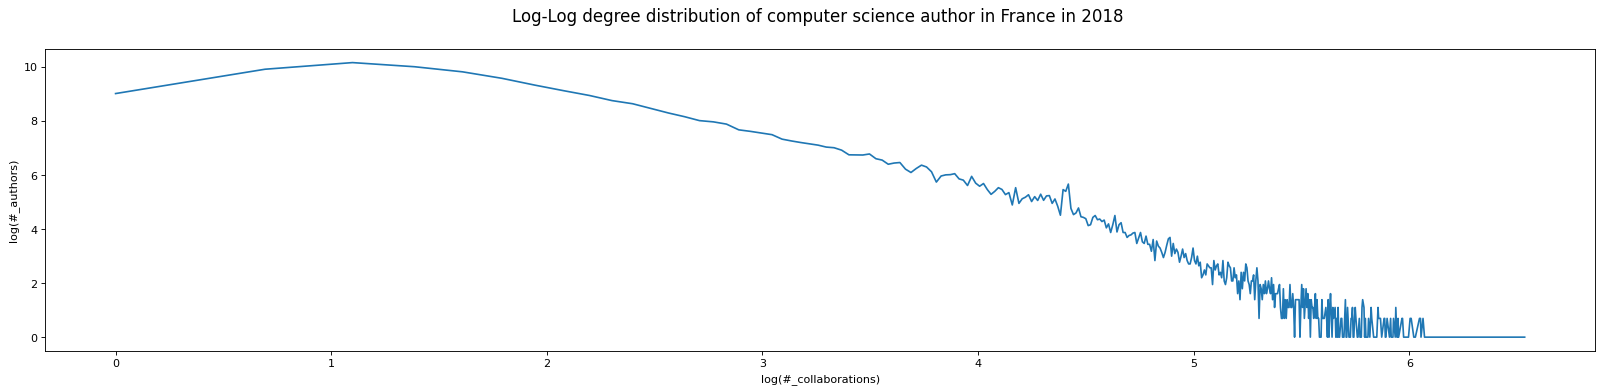

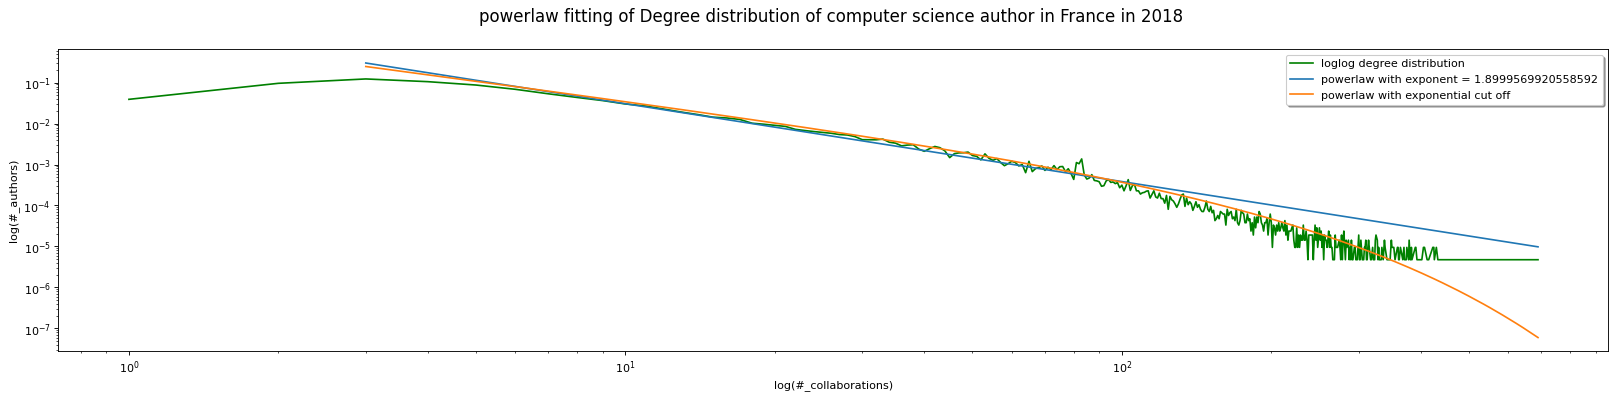

================================================================ HOLE SIZE 17 ================================================================


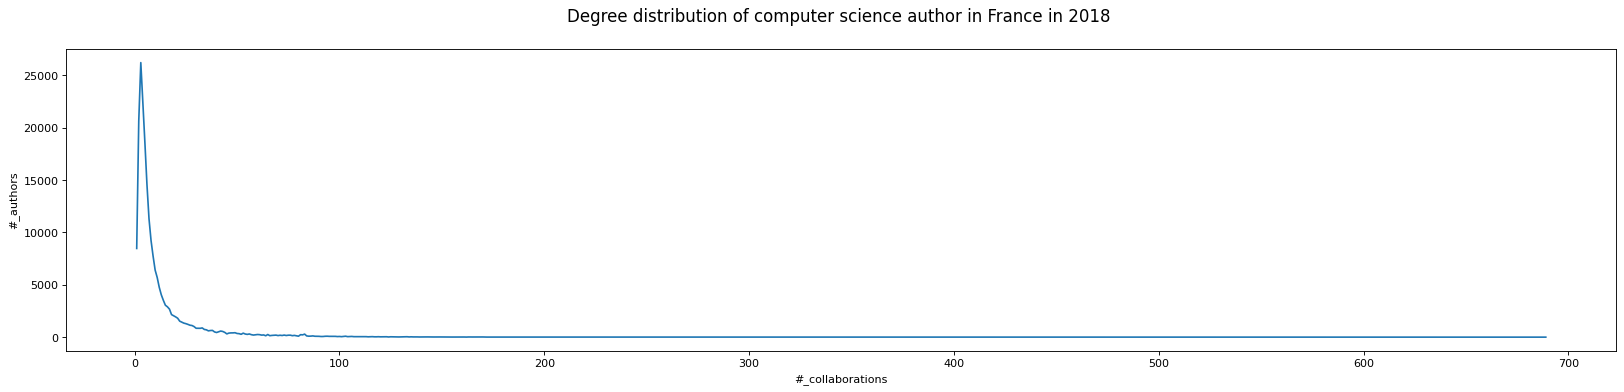

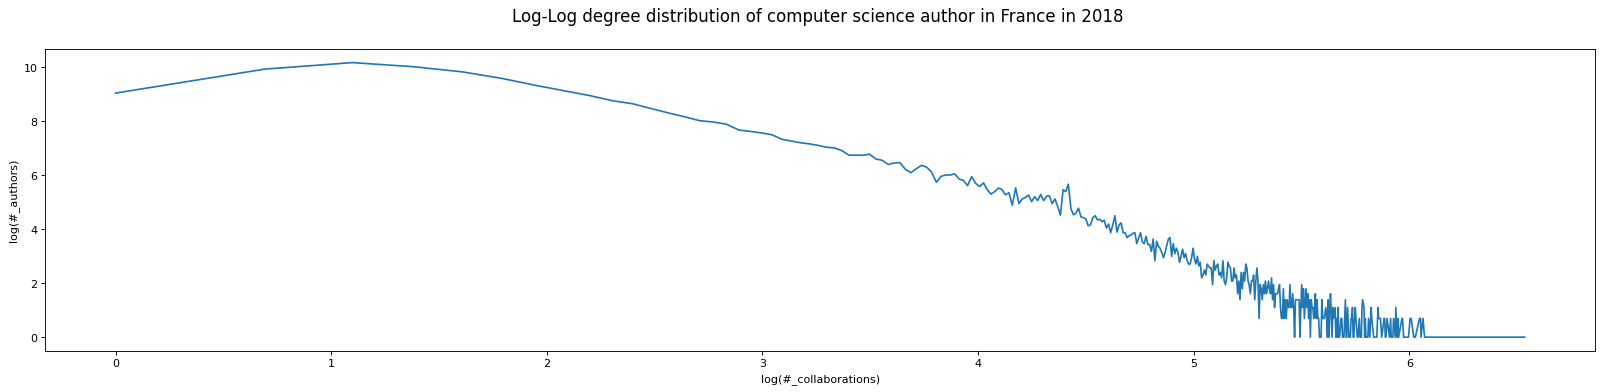

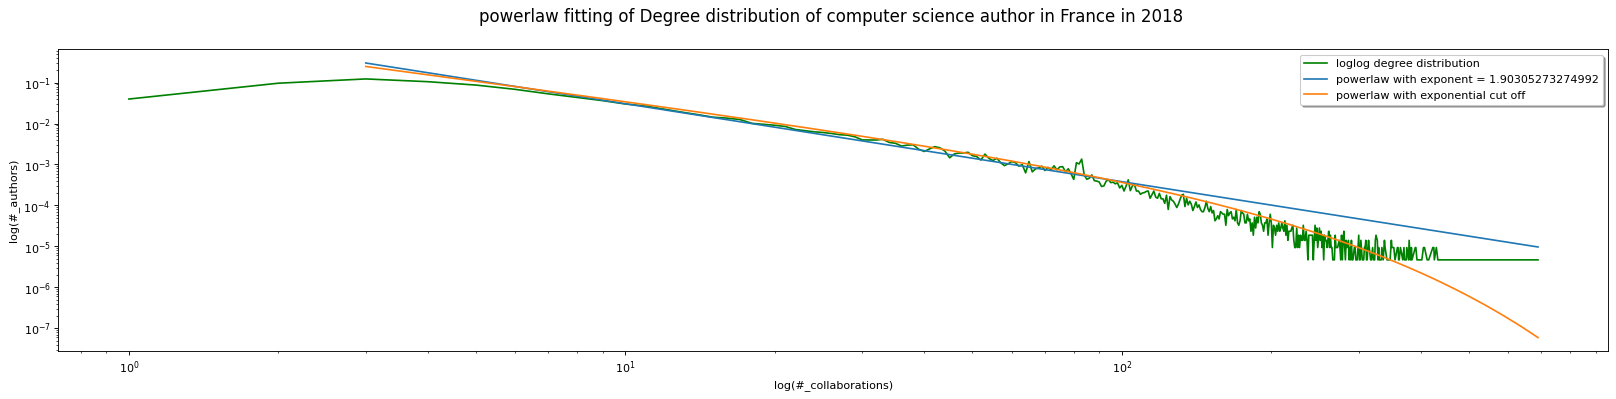

================================================================ HOLE SIZE 18 ================================================================


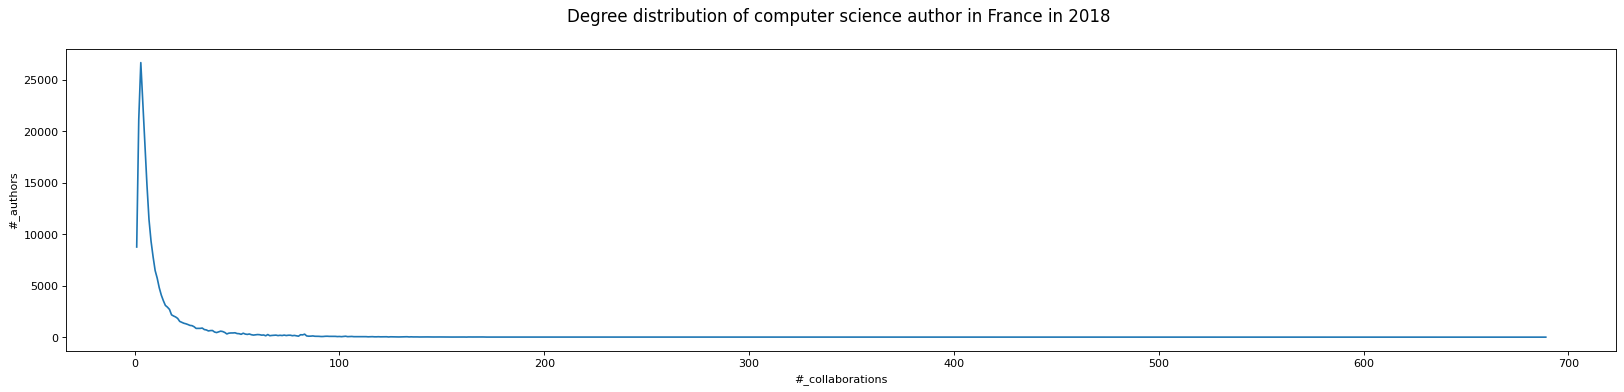

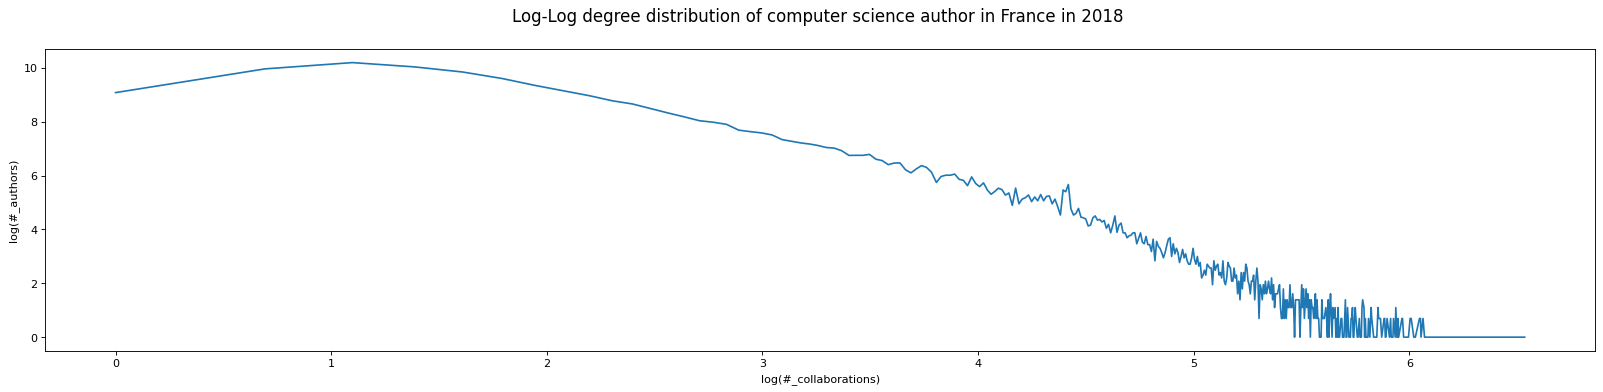

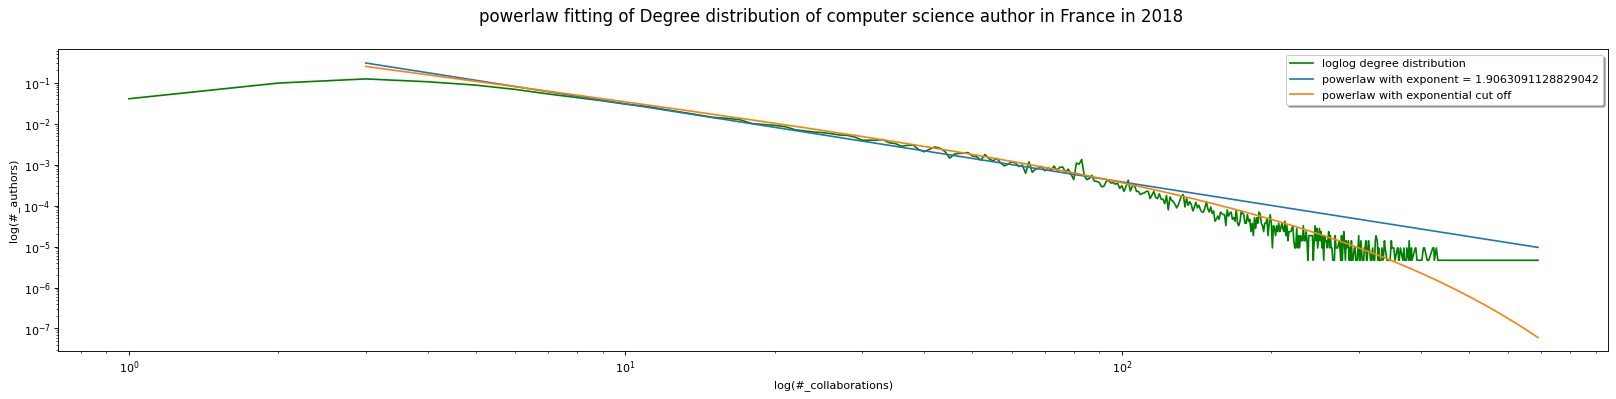

================================================================ HOLE SIZE 19 ================================================================


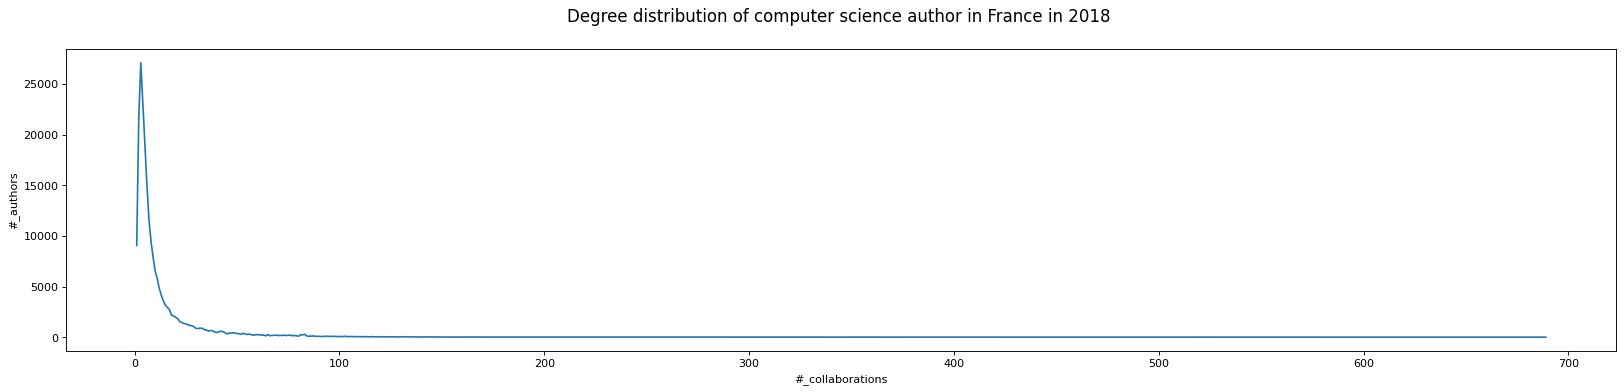

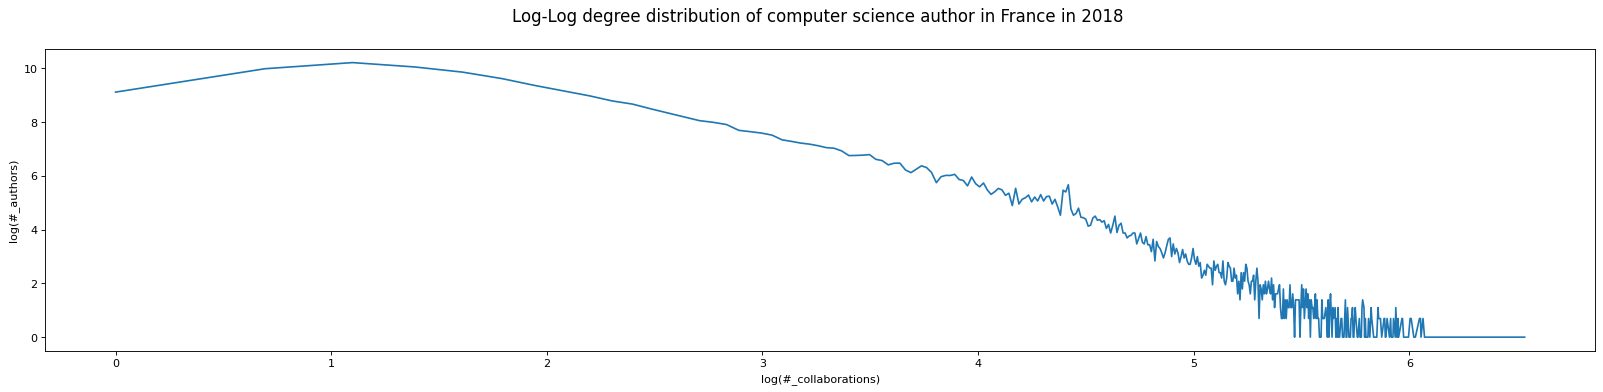

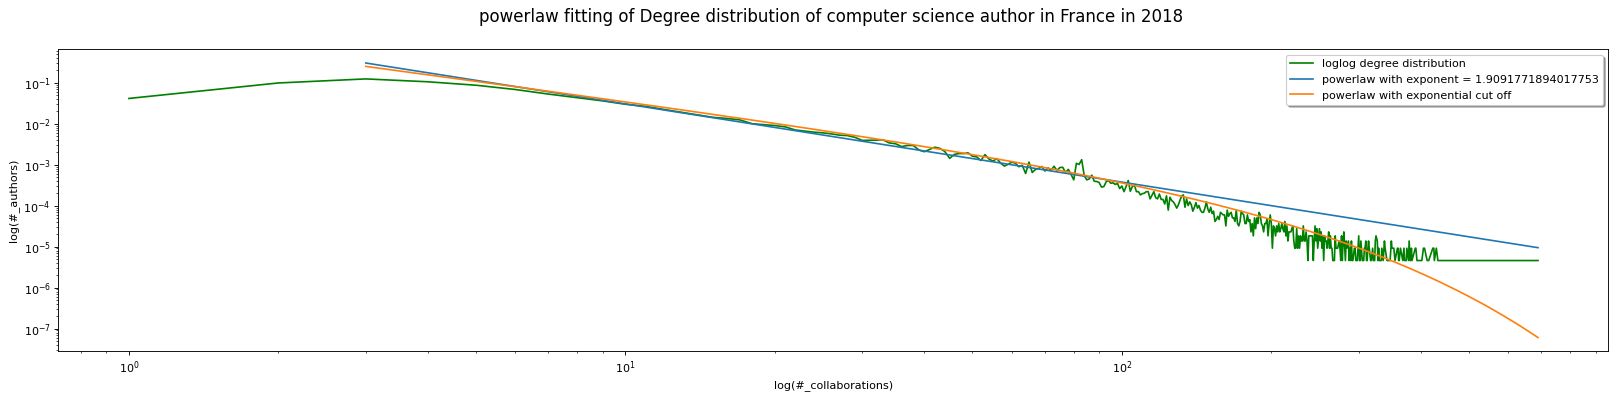

================================================================ HOLE SIZE 20 ================================================================


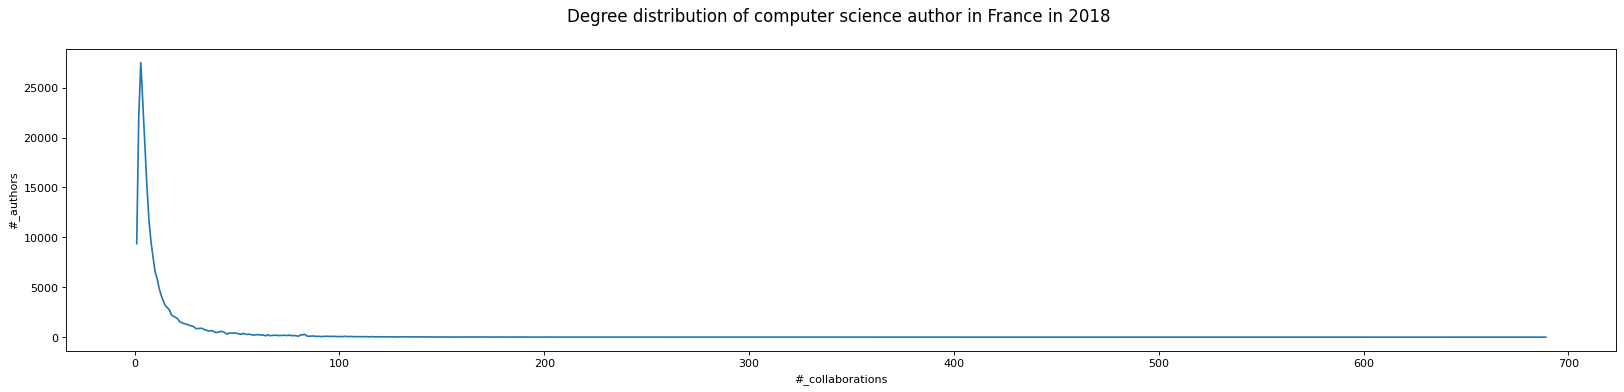

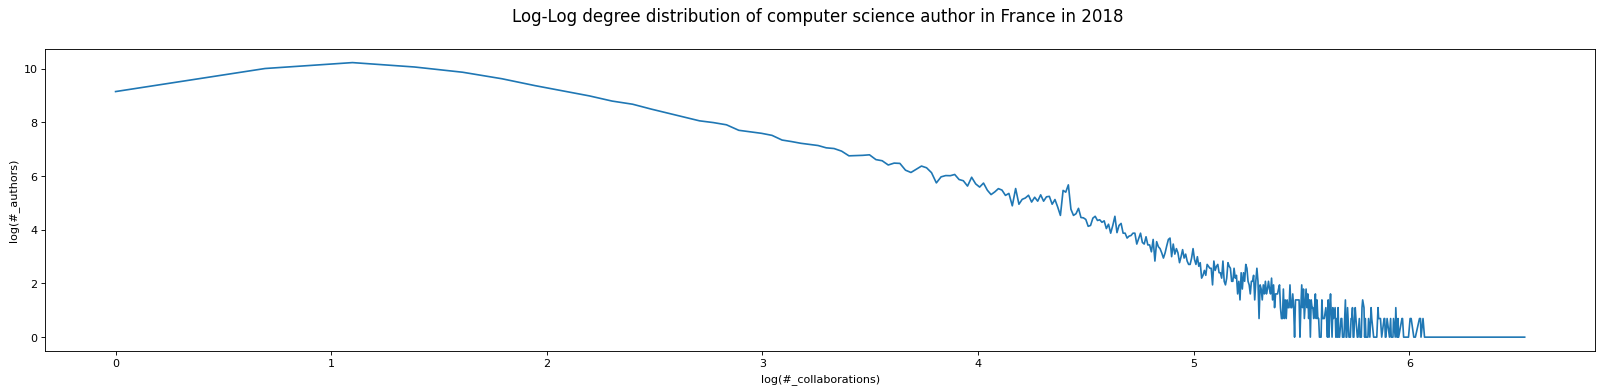

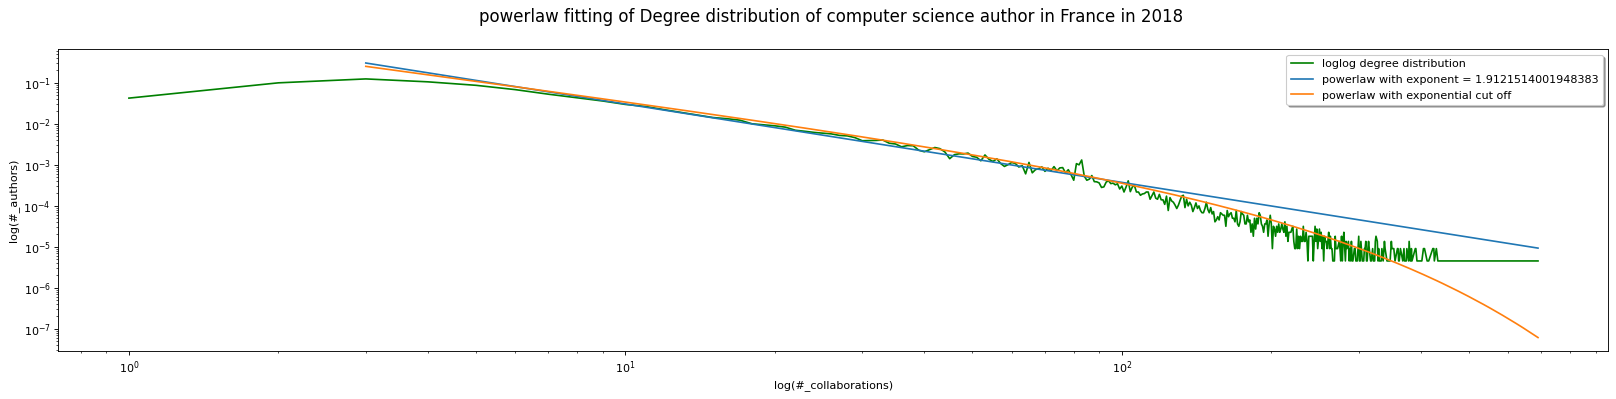

================================================================ HOLE SIZE 21 ================================================================


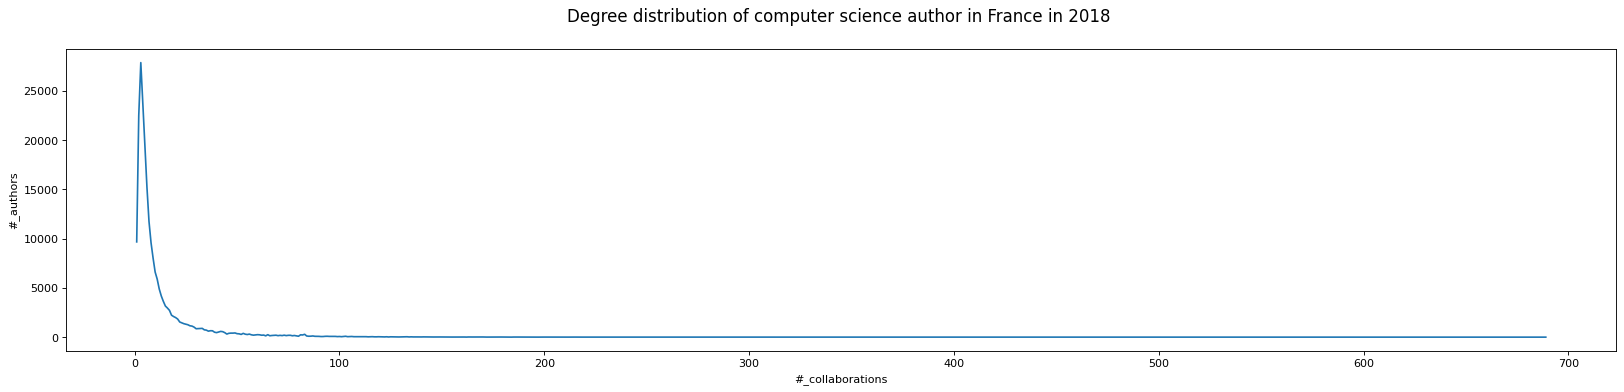

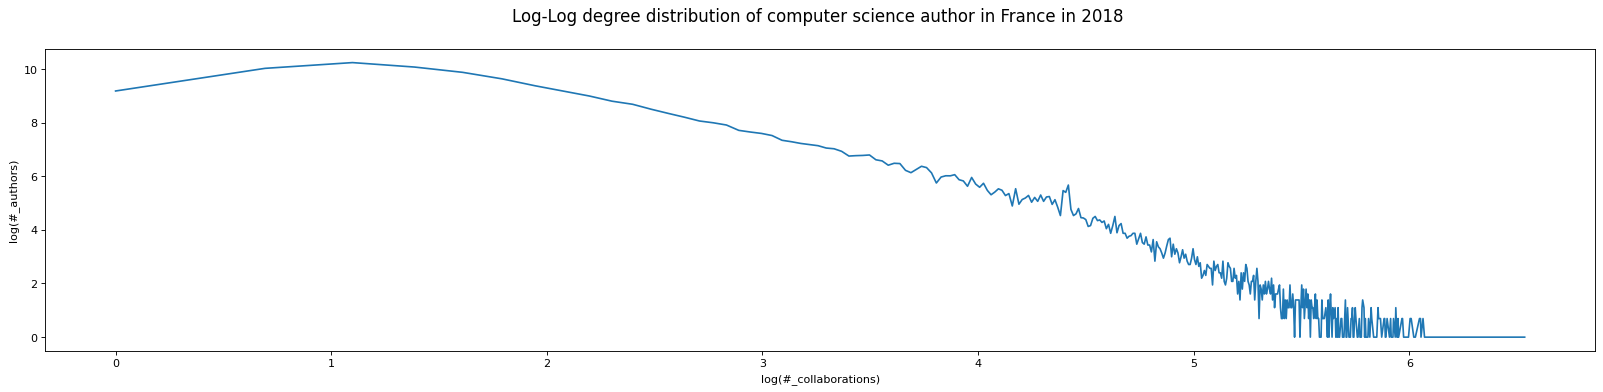

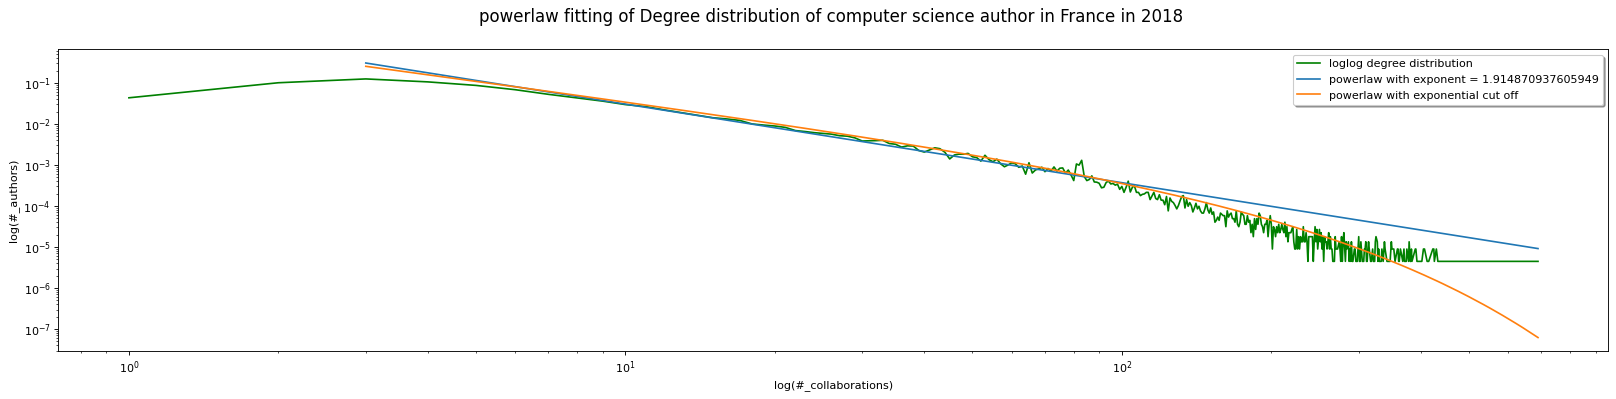

================================================================ HOLE SIZE 22 ================================================================


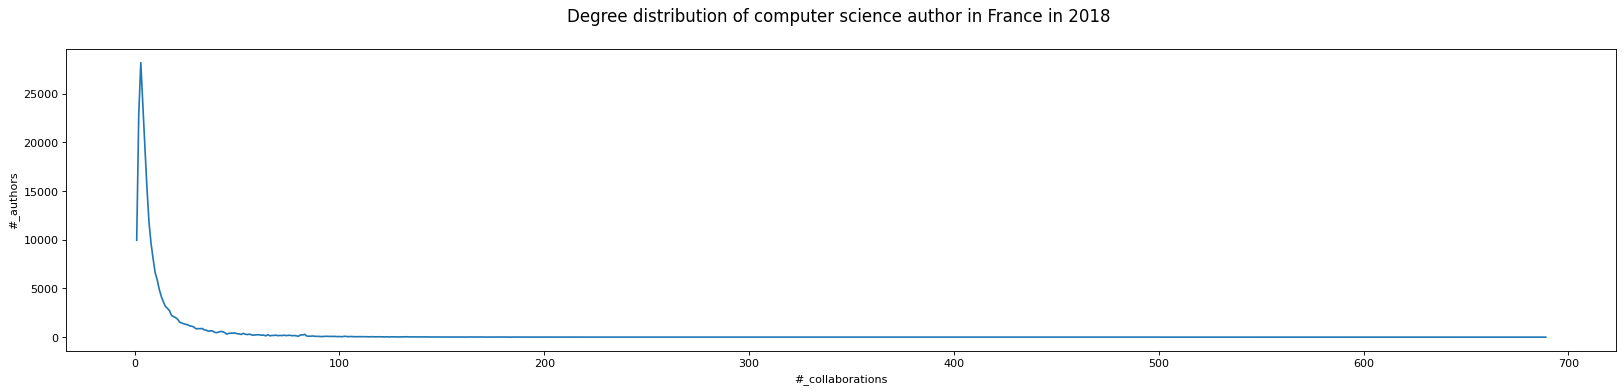

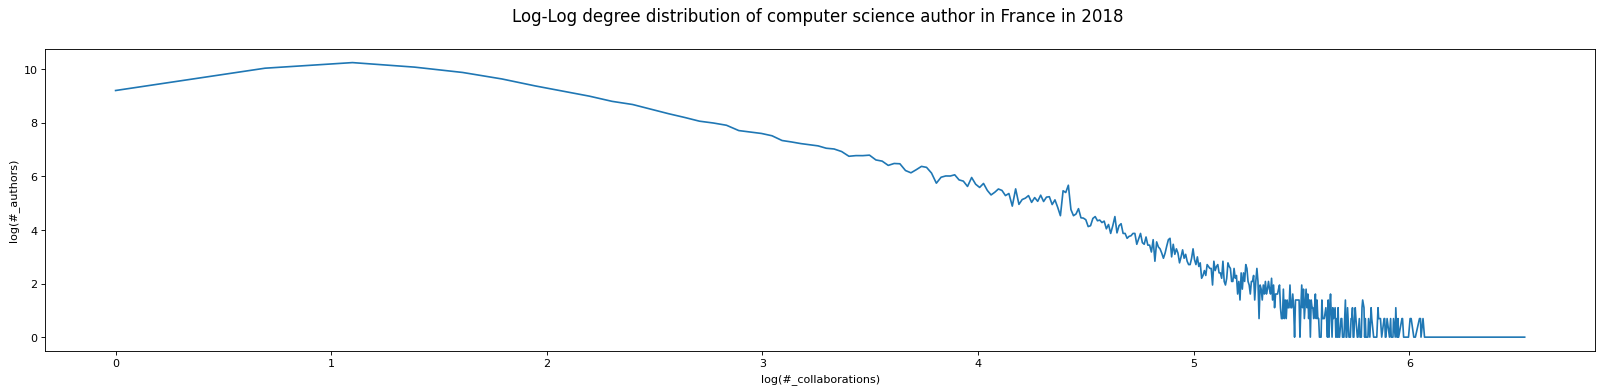

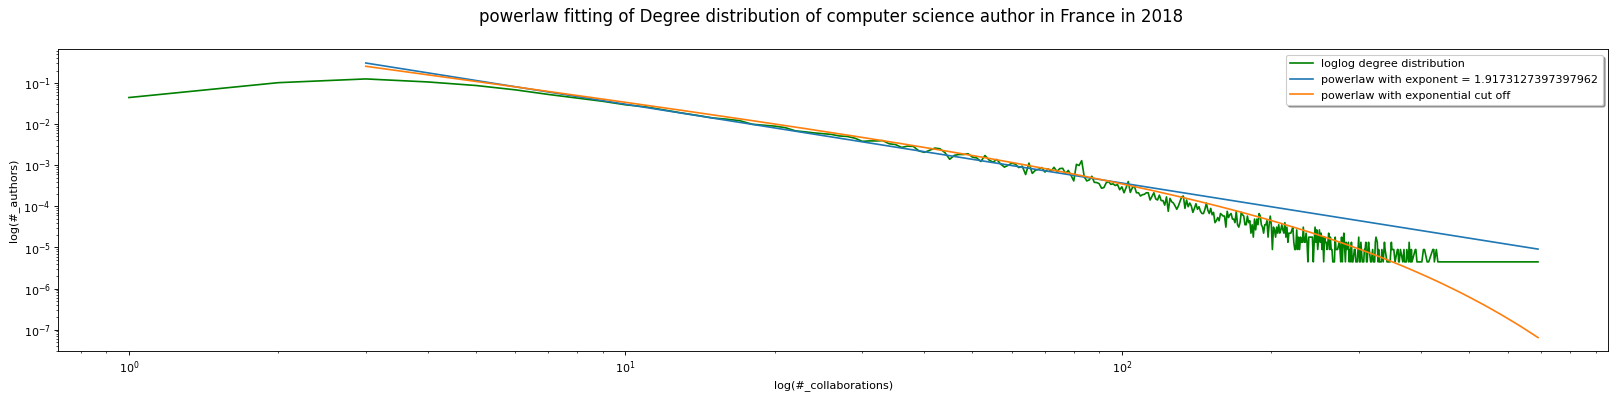

================================================================ HOLE SIZE 23 ================================================================


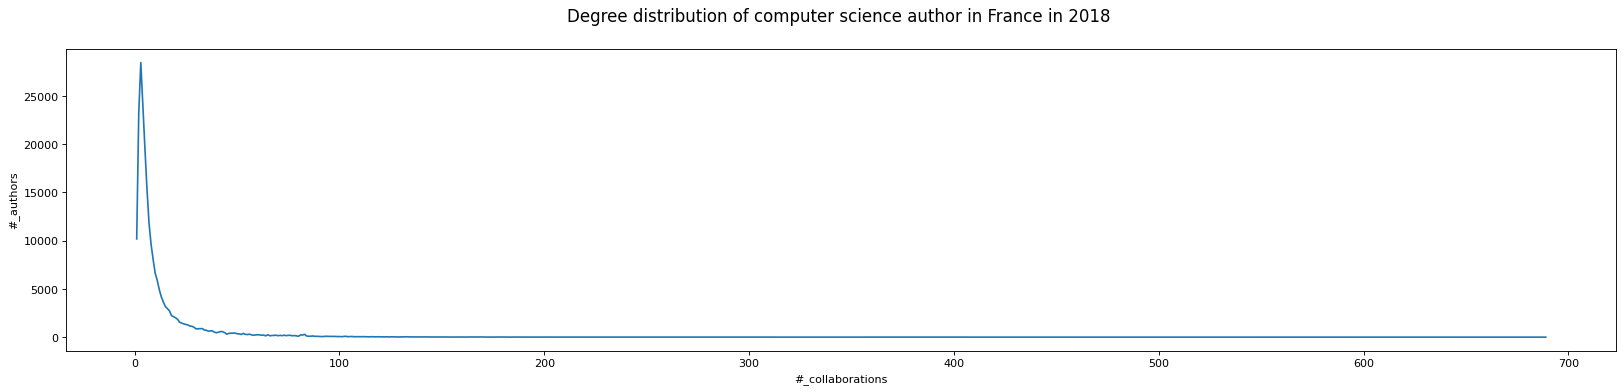

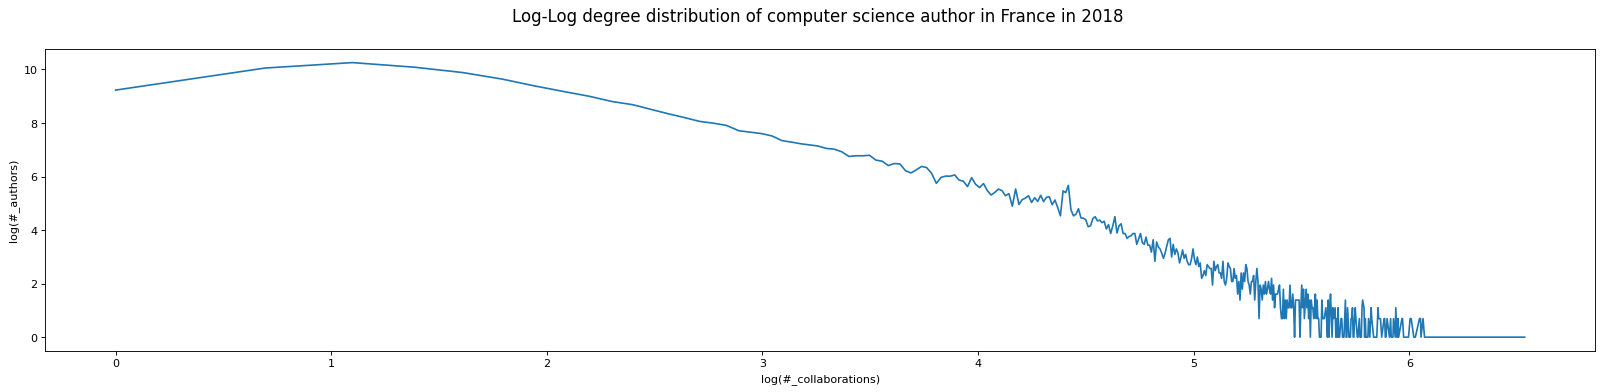

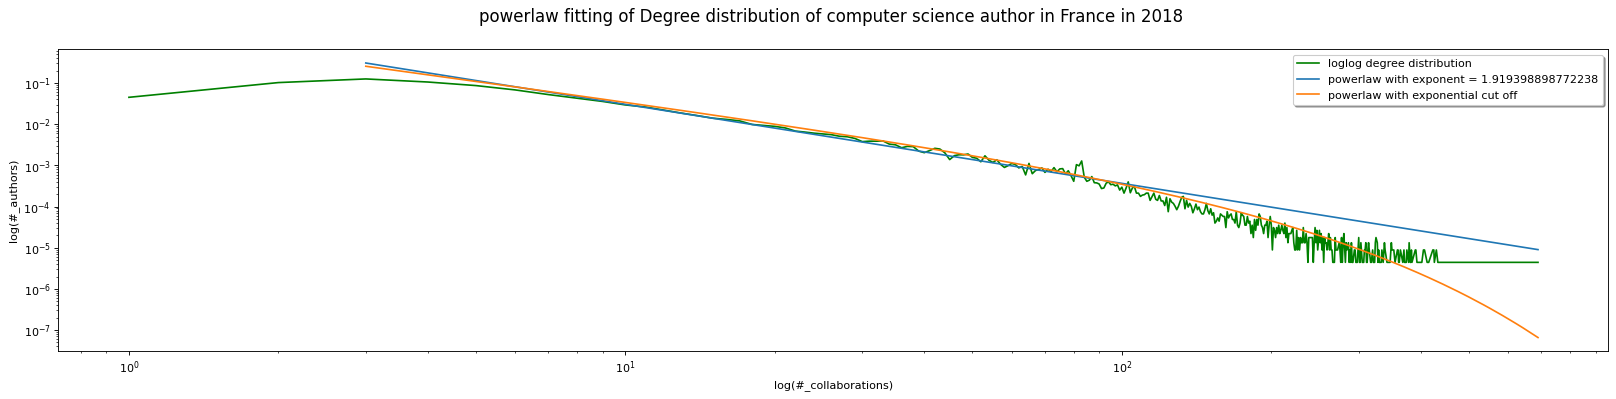

================================================================ HOLE SIZE 24 ================================================================


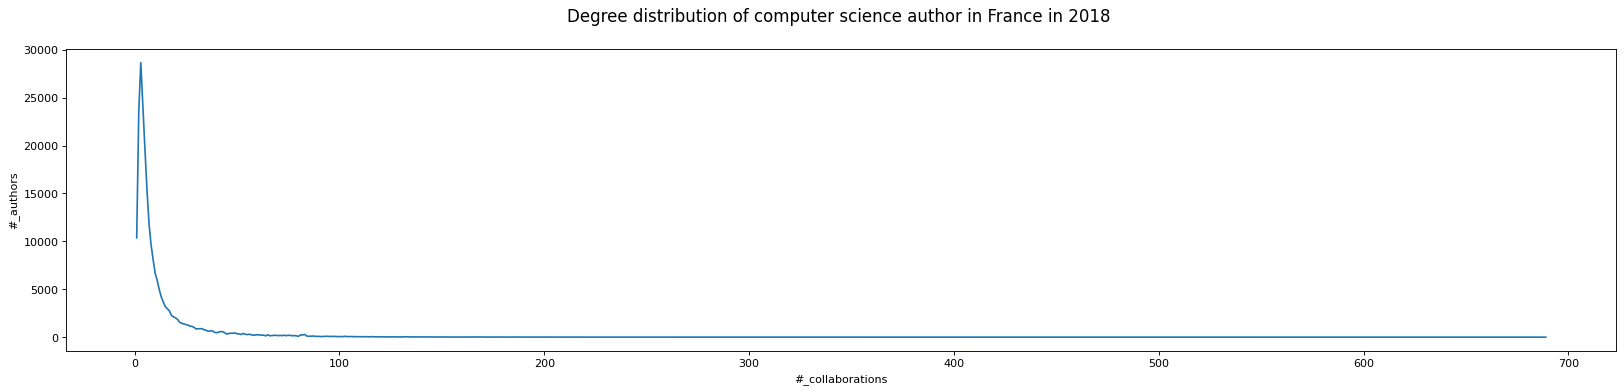

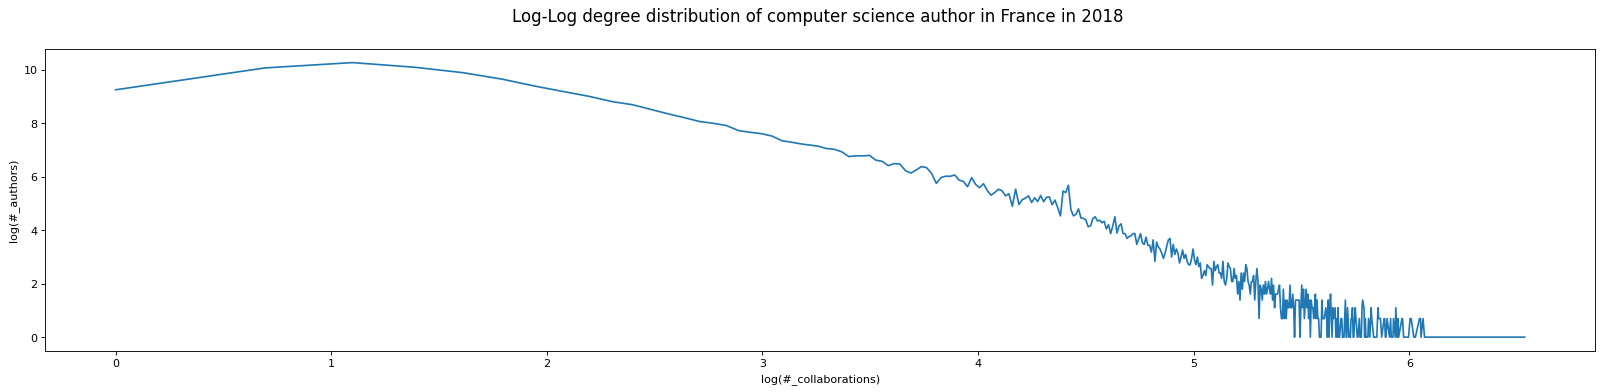

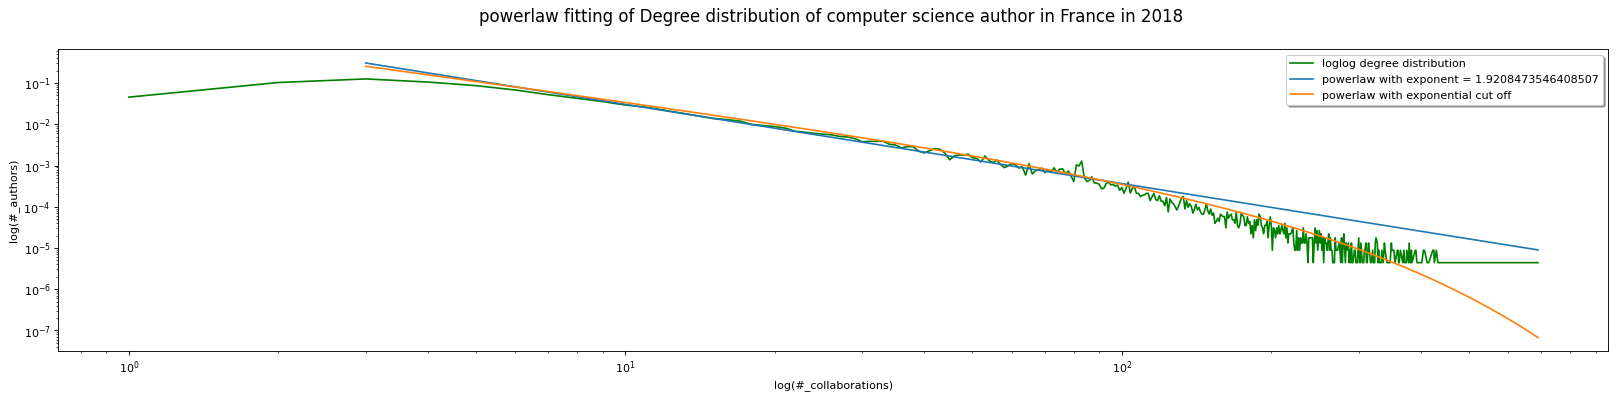

================================================================ HOLE SIZE 25 ================================================================


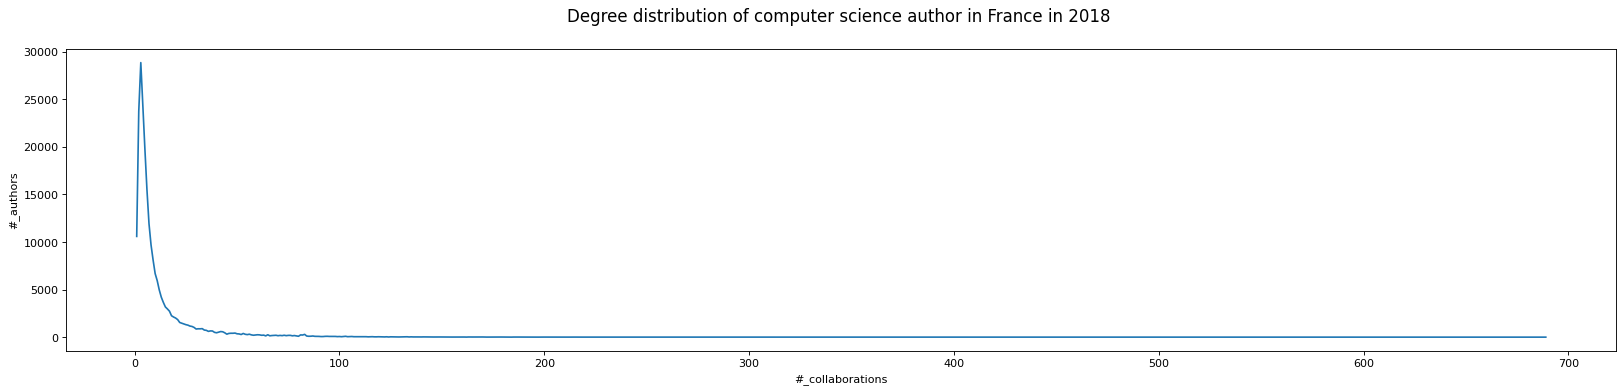

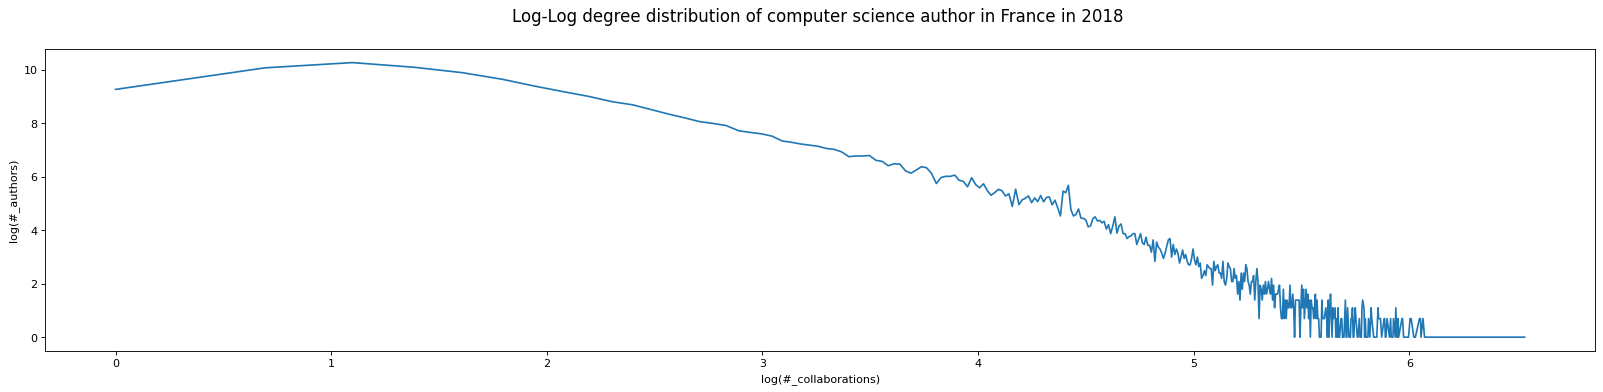

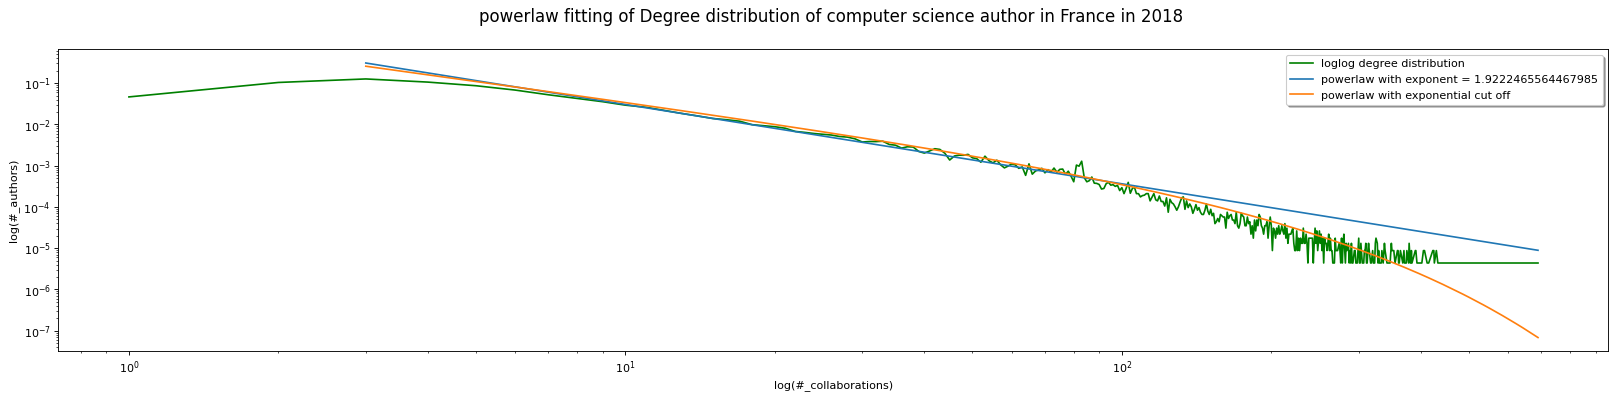

================================================================ HOLE SIZE 26 ================================================================


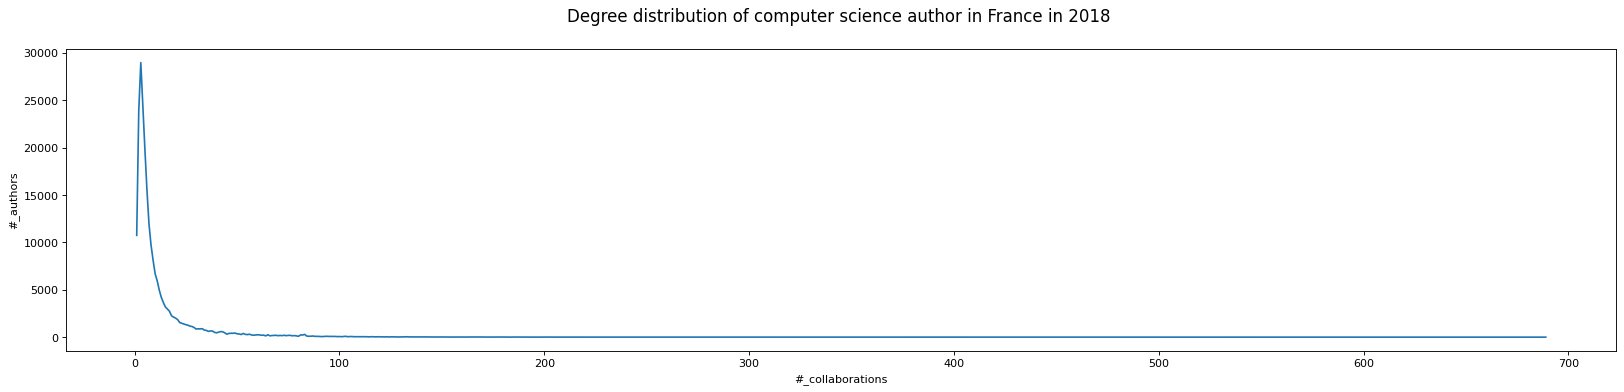

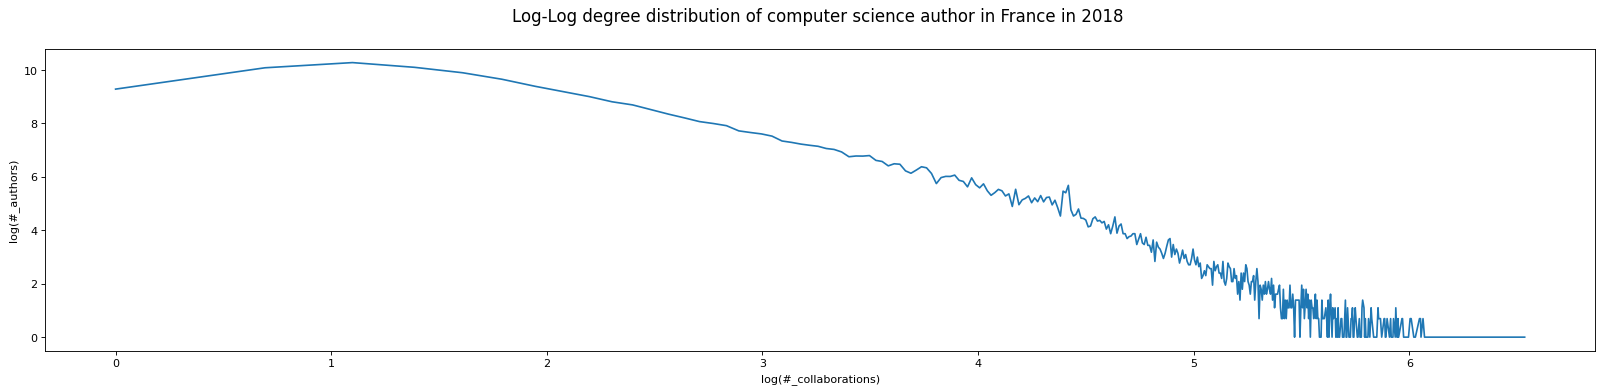

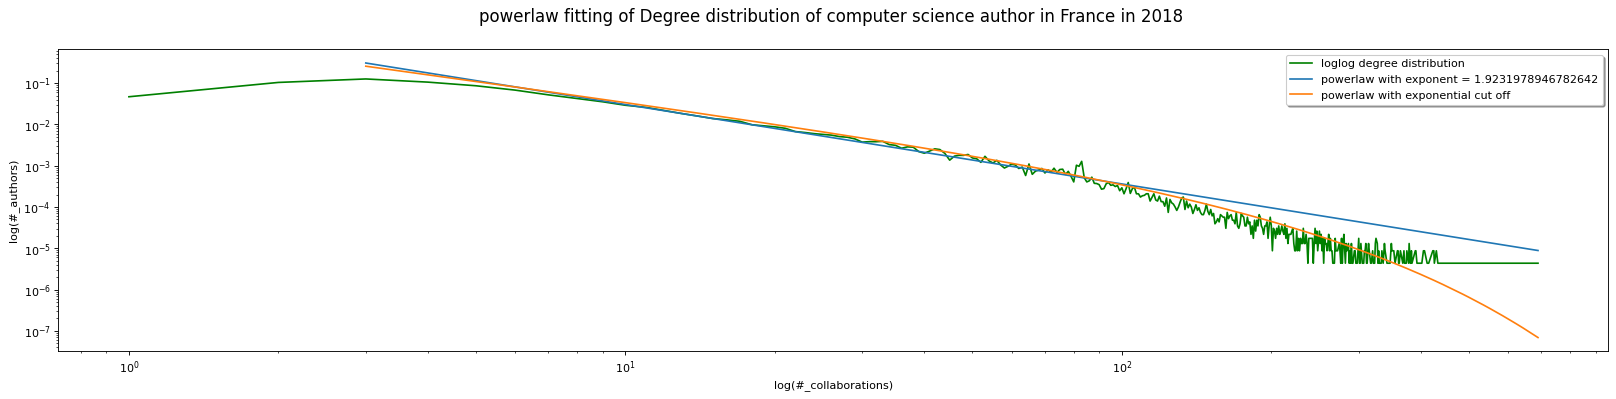

================================================================ HOLE SIZE 27 ================================================================


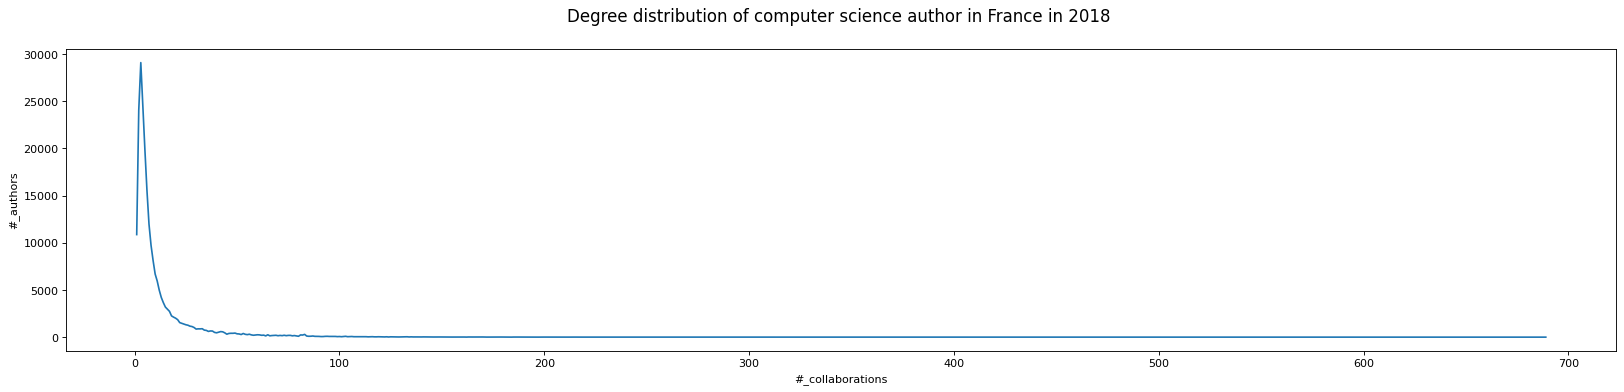

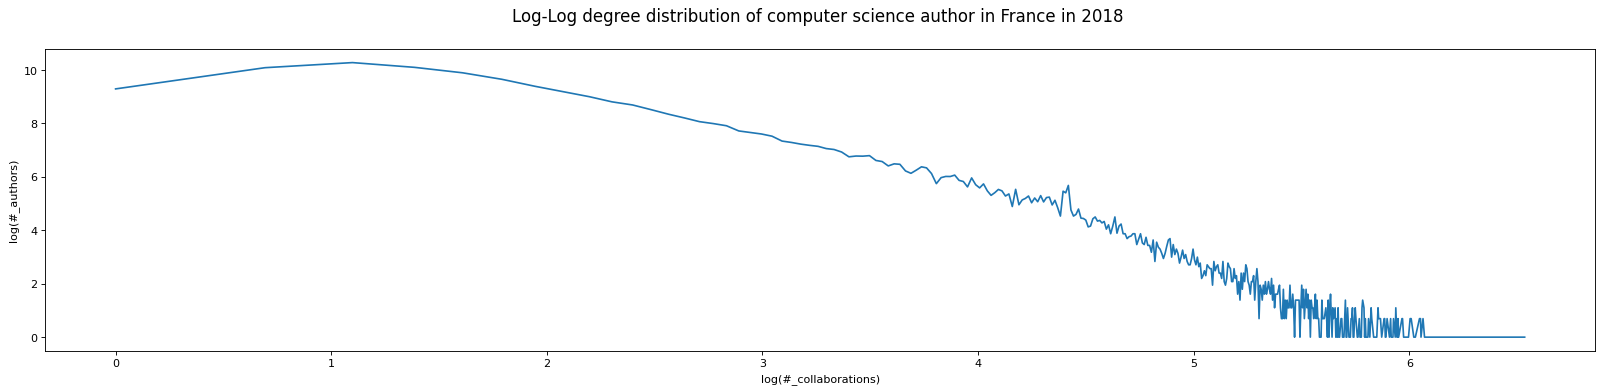

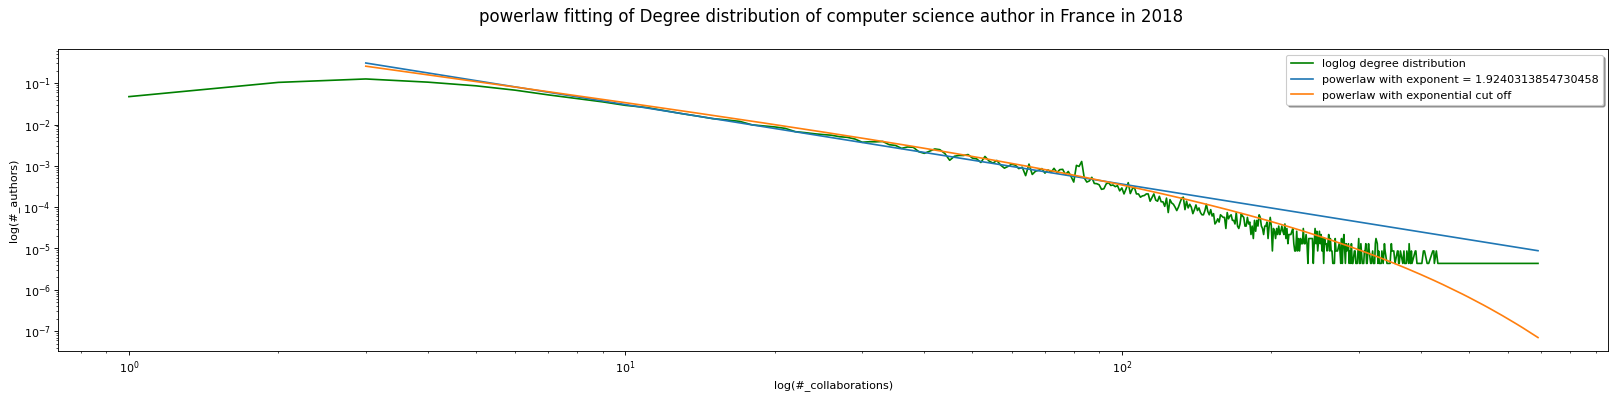

================================================================ HOLE SIZE 28 ================================================================


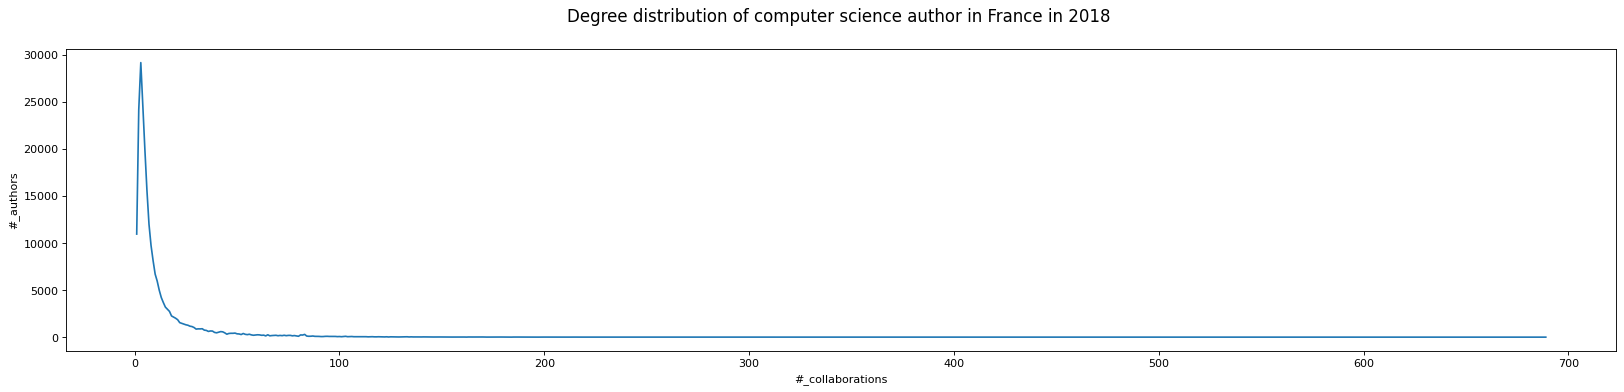

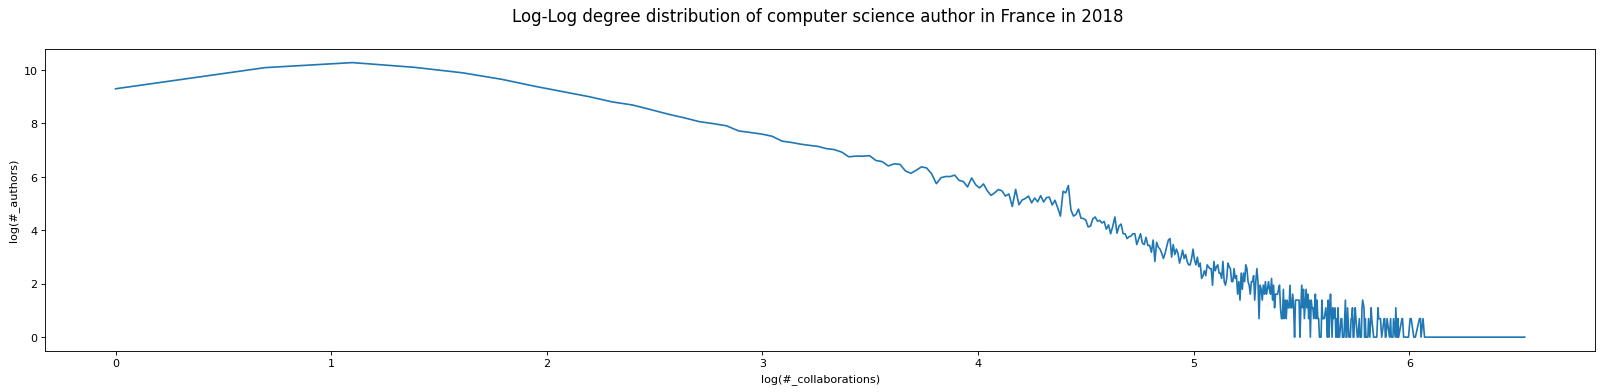

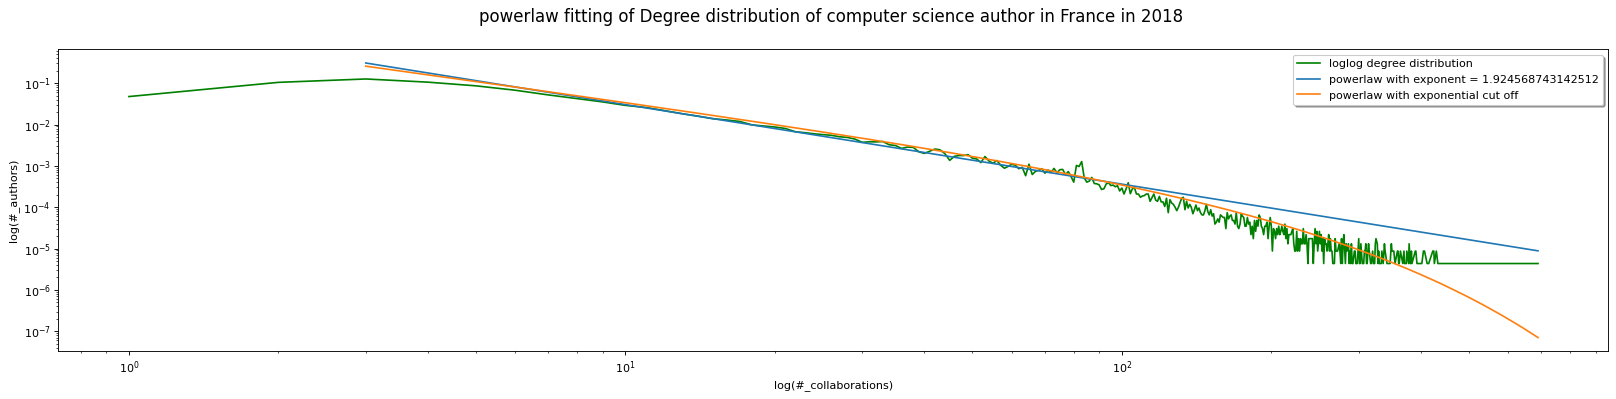

In [3]:
min_size = 0
max_size = 28

path = 'myDATA/45-degree_distribution/by_holeSize'
if not os.path.exists(path):
    os.mkdir(path)
    
for size in range(min_size, max_size+1):
    print((' \033[1m' + "HOLE SIZE "+str(size) + '\033[0m ').center(150, '='))
    
    df = pd.read_csv('myDATA/05-filtered_by_hole_size/filtered_by_hole_size_'+str(size)+'.csv')
    df = df[df["2018"] != 0 ]
    collabs = df["2018"].values

    ## Degree Distribution for a given hole size
    distribution = Counter(collabs)
    distribution = dict(sorted(distribution.items()))
    x = list(distribution.keys())
    y = list(distribution.values())

    plt.figure(figsize=(25, 5), dpi=80)
    plt.xlabel("#_collaborations")
    plt.ylabel("#_authors")
    plt.title("Degree distribution of computer science author in France in 2018 \n", fontdict = {'fontsize' : 15})
    plt.plot(x,y)
    
    # save image
    file = path+'/'+str(size)+'hole_degreeDist'
    plt.savefig(file)

    plt.show()

    # log log degree distribution for a given hole size
    plt.figure(figsize=(25, 5), dpi=80)
    plt.xlabel("log(#_collaborations)")
    plt.ylabel("log(#_authors)")
    plt.title("Log-Log degree distribution of computer science author in France in 2018 \n", fontdict = {'fontsize' : 15})
    plt.plot(np.log(x),np.log(y))
    
    # save image
    file = path+'/'+str(size)+'hole_log_log_degreeDist'
    plt.savefig(file)

    plt.show()

    ## Documentation https://pythonhosted.org/powerlaw/

    df = df[df["2018"] != 0 ]

    collabs = df["2018"].values
    fit = powerlaw.Fit(collabs, xmin=3)

    distribution = Counter(collabs)
    distribution = dict(sorted(distribution.items()))
    distribution = {x: y / sum(distribution.values()) for x, y in distribution.items()}

    plt.figure(figsize=(25, 5), dpi=80)
    plt.xlabel("log(#_collaborations)")
    plt.ylabel("log(#_authors)")
    plt.title("powerlaw fitting of Degree distribution of computer science author in France in 2018 \n", fontdict = {'fontsize' : 15})

    # Plot the observed empirical distribution.
    plt.plot(distribution.keys(), distribution.values(), color='g')
    # Plot the fitted power-law distribution.
    fit.power_law.plot_pdf()
    # Plot the fitted power-law distribution with an exponential cutoff.
    fit.truncated_power_law.plot_pdf()
    plt.legend(["loglog degree distribution", "powerlaw with exponent = " + str(fit.alpha), "powerlaw with exponential cut off"], fancybox=True, shadow=True,)
    plt.show()